In [19]:
#%%appyter init
from appyter import magic
magic.init(lambda _=globals: _())

In [20]:
%%appyter hide_code

{% do SectionField(
    name='primary',
    title='Upload Tumor Expression',
    img='upload.png'
) %}

{% set data_type = TabField(
    name='data_type',
    label='Data Type',
    default='bulk RNA-seq',
    description='Start with either scRNA-seq or bulk RNA-seq data. If bulk RNA-seq data is selected we will utilize pre-curated reference matrices to identify cell type-specific expression vectors.',
    required=True,
    section='primary',
    choices={
        'scRNA-seq': [
            TabField(
            name='sc_data_type_ctrl',
            label='Data Format (Data Set 1)',
            default='Plain Text',
            description='Choose a format for scRNA-seq data. Upload either a control and perturbation profile for integration, or a single scRNA-seq profile containing two conditions of interest.',
            required=True,
            choices= {
                'Plain Text': [
                        CustomFileField(
                        name='sc_rna_file_ctrl',
                        label='control scRNA-seq',
                        description='''
    File should be a tsv/csv of the form:

                                        cell 1   cell 2    ...
                    ------------------------------
            Gene/Protein 1    0          2       ...
                    ------------------------------
            Gene/Protein 2    1         1        ...
                    ------------------------------
                        ...                       ... 
                        ''',
                        default='data/GSE171417_rbk_control.tsv.gz',
                        required=False,
                        examples={
                            'GSE171417_rbk_control.tsv.gz': 'https://minio.dev.maayanlab.cloud/sc2targets/GSE171417_rbk_control.tsv.gz',
                        },
                    ),
                    CustomFileField(
                        name='sc_meta_file_ctrl',
                        label='metadata',
                        description='''
                        File should be a tsv/csv of the form:

                            Cell 1 replicate    Group ...
                        ---------------------------------------
                        barcode 1    control_1                   Control       ...
                        ---------------------------------------
                        barcode 2    control_2                   Control       ...
                        ---------------------------------------
                        ...                       ...                    ...        ...
                        ''',
                        default='data/GSE171417_metadata_control.tsv',
                        required=False,
                        examples={
                            'GSE171417_metadata_control.tsv': 'https://minio.dev.maayanlab.cloud/sc2targets/GSE171417_metadata_control.tsv',
                        },
                    ),
                    TextField(
                        name='cell_type_col_ctrl',
                        label='Cell Type Column (Optional)',
                        description='Name of cell type column in uploaded metadata (if not selected, cell type identification will be performed)',
                        default='',
                        hint='cell_type',
                        required=False
                    ),
                    TextField(
                        name='control_cond',
                        label='Control Condition Name (Optional)',
                        description='Name of control in the "Group" column in uploaded metadata',
                        default='Cont',
                        hint='control',
                        required=False
                    ),
                    TextField(
                        name='pert_cond',
                        label='Perturbation Condition Name (Optional)',
                        description='Name of perturbation in the "Group" column in uploaded metadata (if not selected, we assume two single cell profiles are being uploaded)',
                        default='',
                        hint='perturbation',
                        required=False
                    )
                ],
                '.mtx': [
                    CustomFileField(
                        name='matrix_sc_1',
                        label='scRNA-seq matrix file',
                        description='''
                        File should be a mtx format (10x Genomics/Cell Ranger Standard)
                        ''',
                        default='',
                        required=False,
                        constraint='*.mtx',
                        accepts='Accepts .mtx (.gz)',
                        examples={
                            'Melanoma_matrix.tsv.gz': 'https://minio.dev.maayanlab.cloud/sc2targets/matrix.mtx.gz',
                        },
                    ),
                    CustomFileField(
                        name='barcode_sc_1',
                        label='scRNA-seq',
                        description='''
                        File should be a tsv format
                        ''',
                        default='',
                        required=False,
                        accepts='Accepts .tsv, .csv, .txt (.gz)',
                        examples={
                            'Melanoma_barcodes.tsv.gz': 'https://minio.dev.maayanlab.cloud/sc2targets/barcodes.tsv.gzv',
                        },
                    ),
                    CustomFileField(
                        name='features_sc_1',
                        label='scRNA-seq',
                        description='''
                        File should be a tsv format
                        ''',
                        default='',
                        required=False,
                        accepts='Accepts .tsv, .csv, .txt (.gz)',
                        examples={
                            'Melanoma_features.tsv.gz': 'https://minio.dev.maayanlab.cloud/sc2targets/features.tsv.gz',
                        },
                    ),
                    TextField(
                        name='cell_type_col_1',
                        label='Cell Type Column (Optional)',
                        description='Name of cell type column in uploaded metadata (if not selected, cell type identification will be performed)',
                        default='',
                        hint='cell_type',
                        required=False
                    ),
                    TextField(
                        name='control_cond_1',
                        label='Control Condition Name (Optional)',
                        description='Name of control in the "Group" column in uploaded metadata',
                        default='Cont',
                        hint='control',
                        required=False
                    ),
                    TextField(
                        name='pert_cond_1',
                        label='Perturbation Condition Name (Optional)',
                        description='Name of perturbation in the "Group" column in uploaded metadata (if not selected, we assume two single cell profiles are being uploaded)',
                        default='',
                        hint='perturbation',
                        required=False
                    )
                ],
                'anndata': [
                    CustomFileField(
                        name='anndata_sc_1',
                        label='scRNA-seq',
                        description='''
                        File should be an anndata format, assuming that cell types are in the "obs" field under "cell_type" key and
                        the "var" field should contain the gene names in the index. The "Group" obs field should contain the group 
                        names / conditions if combining with another experiment, please include batch information under "replicate" obs field.
                        ''',
                        default='',
                        required=False,
                        accepts='Accepts .h5ad (.gz)',
                        examples={
                            'tabula_sapiens_skin.h5ad': 'https://datasets.cellxgene.cziscience.com/2a73a5e8-1360-44c5-a4fa-d470f0b17286.h5ad',
                        }
                    ),
                    TextField(
                        name='control_cond_anndata',
                        label='Control Condition Name (Optional)',
                        description='Name of control in the "Group" column in uploaded metadata. This should be specified if a single anndata object with multiple conditions is being used',
                        default='Cont',
                        hint='control',
                        required=False
                    ),

                ]
            }
        ),
        TabField(
            name='sc_data_type',
            label='Data format (Data Set 2)',
            default='Plain Text',
            description='Choose a format for scRNA-seq data',
            required=True,
            choices= {
                'Plain Text': [
                        CustomFileField(
                        name='sc_rna_file_pert',
                        label='scRNA-seq',
                        description='''
    File should be a tsv/csv of the form:

                                        cell 1   cell 2    ...
                    ------------------------------
            Gene/Protein 1    0          2       ...
                    ------------------------------
            Gene/Protein 2    1         1        ...
                    ------------------------------
                        ...                       ... 
                        ''',
                        default='data/GSE171417_rbk_experimental.tsv.gz',
                        required=False,
                        examples={
                            'GSE171417_rbk_experimental.tsv.gz': 'https://minio.dev.maayanlab.cloud/sc2targets/GSE171417_rbk_experimental.tsv.gz',
                        },
                    ),
                    CustomFileField(
                        name='sc_meta_file_pert',
                        label='metadata',
                        description='''
                        File should be a tsv/csv of the form:

                            replicate    Group  ...
                        ---------------------------------------
                        Barcode 1    perturbation_1                  Perturbation       ...
                        ---------------------------------------
                        Barcode 2    perturbation_2                  Perturbation       ...
                        ---------------------------------------
                        ...                       ...                    ...        ...
                        ''',
                        default='data/GSE171417_metadata_experimental.tsv',
                        required=False,
                        examples={
                            'GSE171417_metadata_experimental.tsv': 'https://minio.dev.maayanlab.cloud/sc2targets/GSE171417_metadata_experimental.tsv',
                        },
                    ),
                    TextField(
                        name='cell_type_col_pert',
                        label='Cell Type Column (Optional)',
                        description='Name of cell type column in uploaded metadata (if not selected, cell type identification will be performed)',
                        default='',
                        hint='cell_type',
                        required=False
                    ),
                    TextField(
                        name='pert_name_pert',
                        label='Perturbation Condition Name (Optional)',
                        description='Name of control in the "Group" column in uploaded metadata',
                        default='Krt20',
                        hint='disease',
                        required=False
                    )
                    ],
                '.mtx': [
                    CustomFileField(
                        name='matrix_sc_2',
                        label='scRNA-seq matrix file',
                        description='''
                        File should be a mtx format (10x Genomics/Cell Ranger Standard)
                        ''',
                        default='',
                        required=False,
                        constraint='*.mtx',
                        accepts='Accepts .mtx (.gz)',
                        examples={
                             'Melanoma_matrix.tsv.gz': 'https://minio.dev.maayanlab.cloud/sc2targets/matrix.mtx.gz',
                        },
                    ),
                    CustomFileField(
                        name='barcode_sc_2',
                        label='scRNA-seq',
                        description='''
                        File should be a tsv format
                        ''',
                        default='',
                        required=False,
                        accepts='Accepts .tsv, .csv, .txt (.gz)',
                        examples={
                             'Melanoma_barcodes.tsv.gz': 'https://minio.dev.maayanlab.cloud/sc2targets/barcodes.mtx.gz',
                        },
                    ),
                    CustomFileField(
                        name='features_sc_2',
                        label='scRNA-seq',
                        description='''
                        File should be a tsv format
                        ''',
                        default='',
                        required=False,
                        accepts='Accepts .tsv, .csv, .txt (.gz)',
                        examples={
                            'Melanoma_features.tsv.gz': 'https://minio.dev.maayanlab.cloud/sc2targets/features.mtx.gz',
                        },
                    )
                ],
                'anndata': [
                    CustomFileField(
                        name='anndata_sc_2',
                        label='scRNA-seq',
                        description='''
                        File should be an anndata format, assuming that cell types are in the "obs" field under "cell_type" key and
                        the "var" field should contain the gene names in the index. The "Group" obs field should contain the group 
                        names / conditions if combining with another experiment, please include batch information under "replicate" obs field.
                        ''',
                        default='',
                        required=False,
                        constraint='*.h5ad',
                        accepts='Accepts .h5ad (.gz)',
                        examples={
                            'tabula_sapiens_skin.h5ad': 'https://datasets.cellxgene.cziscience.com/2a73a5e8-1360-44c5-a4fa-d470f0b17286.h5ad',
                        }
                    ),
                ]
            }
        )],
        'bulk RNA-seq':[
            CustomFileField(
                name='bulk_expr',
                label='RNA-seq expression',
                description='''
                File should be a tsv/csv of the form:

                    Patient 1 Tumor    Patient 2 Tumor  ...
                ---------------------------------------
                Gene/Protein 1    0                   200       ...
                ---------------------------------------
                Gene/Protein 2    5                   180       ...
                ---------------------------------------
                ...                       ...                    ...        ...
                ''',
                default='data/GSE49155_expression.tsv',
                required=False,
                examples={
                    'GSE49155_expression.tsv': 'https://minio.dev.maayanlab.cloud/sc2targets/GSE49155_expression.tsv',
                },
            ),
            CustomFileField(
                        name='bulk_meta_file',
                        label='metadata',
                        description='''
                        File should be a tsv/csv of the form:

                            Patient 1 Tumor    Patient 2 Tumor  ...
                        ---------------------------------------
                        Gene/Protein 1    0                   200       ...
                        ---------------------------------------
                        Gene/Protein 2    5                   180       ...
                        ---------------------------------------
                        ...                       ...                    ...        ...
                        ''',
                        default='data/GSE49155_metadata.tsv',
                        required=False,
                        examples={
                            'GSE49155_metadata.tsv': 'https://minio.dev.maayanlab.cloud/sc2targets/GSE49155_metadata.tsv',
                        },
                    ),
                    TextField(
                        name='condition_col',
                        label='Condition Column',
                        description='Name of the condition column in uploaded metadata',
                        default='condition',
                        required=True
                    ),
                    TextField(
                        name='ctrl_condition',
                        label='Control Condition Name',
                        description='Name of the control condition in the condition column in uploaded metadata',
                        default='normal',
                        required=True
                    ),
                    ChoiceField(
                        name='reference',
                        label='Single Cell Reference',
                        description='Choose a single cell reference to use for cell type deconvolution',
                        default='Kidney - Tabula Sapiens (Human)',
                        required=True,
                        choices={
                            "Pancreas - Tabula Sapiens (Human)": "tabula_sapiens_pancreas",
                            "Adipose Tissue - Tabula Sapiens (Human)": "tabula_sapiens_adipose",
                            "Adipose Tissue - Tabula Muris (Mouse)": "tabula_muris_adipose",
                            "Liver - Tabula Sapiens (Human)": "tabula_sapiens_liver",
                            "Blood - Tabula Sapiens (Human)": "tabula_sapiens_blood",
                            "Kidney - Tabula Sapiens (Human)": "tabula_sapiens_kidney",
                            "Kidney - Lake et al. 2023 (Human)": "human_kidney_lake_et_al_2023",
                            "Brain (non-myeloid) - Tabula Muris (Mouse)": "tabula_muris_brain-non-myeloid",
                            "Heart - Tabula Sapiens (Human)": "tabula_sapiens_heart",
                            "Heart - Tabula Muris (Mouse)": "tabula_muris_heart",
                            "Muscle - Tabula Sapiens (Human)": "tabula_sapiens_muscle",
                            "Muscle - Tabula Muris (Mouse)": "tabula_muris_muscle",
                            "Skin - Tabula Sapiens (Human)": "tabula_sapiens_skin",
                            "Lung - Tabula Sapiens (Human)": "tabula_sapiens_lung",
                            "Lung - Tabula Muris (Mouse)": "tabula_muris_lung",
                            "Spleen - Tabula Sapiens (Human)": "tabula_sapiens_spleen",
                            "Spleen - Tabula Muris (Mouse)": "tabula_muris_spleen",
                            "Prostate - Tabula Sapiens (Human)": "tabula_sapiens_prostate",
                            "Lung Cancer Atlas (LuCA) - Salcher et al. 2022 (Human)": "salcher-et-al-lung-cancer",
                            }
                    )
         ]
        }
) %}

#"Pancreas - Tritschler et al. (Mouse)": "https://cellxgene.cziscience.com/collections/0a77d4c0-d5d0-40f0-aa1a-5e1429bcbd7e",
#"Adipose Tissue - Emont et al. (Mouse)": "https://cellxgene.cziscience.com/collections/fe0e718d-2ee9-42cc-894b-0b490f437dfd",
#"Liver - MacParland et al. 2018 (Human)": "https://cellxgene.cziscience.com/collections/bd5230f4-cd76-4d35-9ee5-89b3e7475659",
#"Skeletal Muscle - Domínguez Conde et al. 2022 (Human)": "https://cellxgene.cziscience.com/collections/62ef75e4-cbea-454e-a0ce-998ec40223d3",
#"Heart - Litviňuková et al. 2020 (Mouse)": "https://cellxgene.cziscience.com/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72",
#"Retina - Li et al. 2023 (Human)": "https://cellxgene.cziscience.com/collections/4c6eaf5c-6d57-4c76-b1e9-60df8c655f1e",
#"Retina - Cowan et al. 2020 (Mouse)": "https://cellxgene.cziscience.com/collections/2f4c738f-e2f3-4553-9db2-0582a38ea4dc",
#Breast - Reed et al. 2024 (Human)": "https://cellxgene.cziscience.com/collections/48259aa8-f168-4bf5-b797-af8e88da6637",


{% set n_neighbors = IntField(
    name='n_neighbors',
    label='N neighbors', 
    default=15, 
    min=2,
    max=100,
    step=1,
    description='The size of local neighborhood (in terms of number of neighboring data points) used for manifold approximation.', 
    section='primary'
)
%}

{% set min_dist = FloatField(
    name='min_dist',
    label='Min Distance', 
    default=0.01, 
    min=0.00001,
    max=0.9,
    step=0.00001,
    description='The effective minimum distance between embedded points.', 
    section='primary'
)
%}

{% set resolution = FloatField(
    name='resolution',
    label='Resolution', 
    default=1, 
    min=0.1,
    max=2,
    step=0.1,
    description='A parameter value controlling the coarseness of the clustering. Higher values lead to more clusters.', 
    section='primary'
)
%}

{% set species = ChoiceField(
    name='species',
    label='Species', 
    default='human',
    choices=['human', 'mouse'],
    description='Choose a species', 
    required=True,
    section='primary'
)
%}


{% set membrane_screener_list = 'https://appyters.maayanlab.cloud/storage/Tumor_Gene_Target_Screener/surfaceome.csv' %}


```python
#"Pancreas - Tritschler et al. (Mouse)": "https://cellxgene.cziscience.com/collections/0a77d4c0-d5d0-40f0-aa1a-5e1429bcbd7e",
#"Adipose Tissue - Emont et al. (Mouse)": "https://cellxgene.cziscience.com/collections/fe0e718d-2ee9-42cc-894b-0b490f437dfd",
#"Liver - MacParland et al. 2018 (Human)": "https://cellxgene.cziscience.com/collections/bd5230f4-cd76-4d35-9ee5-89b3e7475659",
#"Skeletal Muscle - Domínguez Conde et al. 2022 (Human)": "https://cellxgene.cziscience.com/collections/62ef75e4-cbea-454e-a0ce-998ec40223d3",
#"Heart - Litviňuková et al. 2020 (Mouse)": "https://cellxgene.cziscience.com/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72",
#"Retina - Li et al. 2023 (Human)": "https://cellxgene.cziscience.com/collections/4c6eaf5c-6d57-4c76-b1e9-60df8c655f1e",
#"Retina - Cowan et al. 2020 (Mouse)": "https://cellxgene.cziscience.com/collections/2f4c738f-e2f3-4553-9db2-0582a38ea4dc",
#Breast - Reed et al. 2024 (Human)": "https://cellxgene.cziscience.com/collections/48259aa8-f168-4bf5-b797-af8e88da6637",
```

In [21]:
from helpers import *
import os
import re
import random
import qnorm
import shutil
from string import ascii_uppercase
from tqdm import tqdm
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import decoupler as dc

from matplotlib import cm
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

import networkx as nx

from IPython.display import HTML, display, Markdown, FileLink
from matplotlib.gridspec import GridSpec
from matplotlib_venn import venn2
from maayanlab_bioinformatics.normalization import zscore_normalize, log2_normalize
from maayanlab_bioinformatics.harmonization.ncbi_genes import ncbi_genes_lookup
from maayanlab_bioinformatics.api import enrichr_link_from_genes
from statsmodels.stats.multitest import multipletests

import warnings
warnings.filterwarnings("ignore")

sc.settings.set_figure_params(dpi=300, frameon=True, figsize=(2, 2), fontsize=6)
sc.settings.verbosity = 0

os.makedirs('results', exist_ok=True)
os.makedirs('figures', exist_ok=True)

    
fig_counter = 2
table_counter = 1
letter_counter = 0
discussion_results = {}

import sys
import contextlib
@contextlib.contextmanager
def suppress_output(stdout=True, stderr=True, dest=os.devnull):
    ''' Usage:
    with suppress_output():
        print('hi')
    '''
    dev_null = open(dest, 'a')
    if stdout:
        _stdout = sys.stdout
        sys.stdout = dev_null
    if stderr:
        _stderr = sys.stderr
        sys.stderr = dev_null
    try:
        yield
    finally:
        if stdout:
            sys.stdout = _stdout
        if stderr:
            sys.stderr = _stderr

In [22]:
display(Markdown('## Abstract'))
abstract_text = '''Single cell RNA-seq data enables the profiling of gene expression in individual cells. In disease states, cell type 
proportions and functions are often altered. By utilizing two single cell profiles from a control and experimental condition,
TargetRanger can be used to identify highly expressed cell-surface proteins on diseased cell types that are lowly expressed on the healthy cell type and in healthy cells and tissues.
Additionally, we can use L1000 data to identify compounds most likely to push diseased cell types to a healthy phenotype. SC2Targets also enables this analysis on bulk RNA-seq data, 
identifying cell-type specific expression for each bulk sample using a single cell reference and the the deconvolution algorithm, BayesPrism. Overall, SC2Targets enables the 
identification of cell-type specific targets that and reverser compounds to remove to treat disease. '''

display(Markdown(abstract_text))

## Abstract

Single cell RNA-seq data enables the profiling of gene expression in individual cells. In disease states, cell type 
proportions and functions are often altered. By utilizing two single cell profiles from a control and experimental condition,
TargetRanger can be used to identify highly expressed cell-surface proteins on diseased cell types that are lowly expressed on the healthy cell type and in healthy cells and tissues.
Additionally, we can use L1000 data to identify compounds most likely to push diseased cell types to a healthy phenotype. SC2Targets also enables this analysis on bulk RNA-seq data, 
identifying cell-type specific expression for each bulk sample using a single cell reference and the the deconvolution algorithm, BayesPrism. Overall, SC2Targets enables the 
identification of cell-type specific targets that and reverser compounds to remove to treat disease. 

In [23]:
#load the buttons

## Methods

In [24]:
%%appyter markdown

{% if data_type.raw_value == 'scRNA-seq' %}

*Normalization & Integration*

scRNA-seq data normalization follows the standard Seruat [1] vignette which first includes filtering genes expressed in less than 3 cells and genes expressed in less than 500 cells which is done using scanpy [2]. Then doublets are removed using scrublet [3] and cells with greater than 5% mitochondrial gene expression are removed. 
The remaining cells are then normalized to a total target sum of 10,000, log normalized, and highly variable genes are computed for the top 2000 genes. Then PCA is performed and results are visualized using UMAP [4]. 
If two separate single cell profiles are used, then integration is performed using Harmony [5], generating a harmonized PCA representation of the single cell profiles used for visualization and downstream analysis.

*Cell Type Annotation*

Cells in the integrated profile are clustered using UMAP [4] and the Leiden algorithm [6]. Canonical cell type makers are sourced from PanglaoDB [7] and are used for enrichment analysis and visualization of inferred cell types using decoupleR [8] based on overrepresented markers. 
Then, to prioritize cell types for downstream analysis, we compute the silhouette score for each cell type across the control and perturbation condition. The cell types with the most negative silhouette scores indicate the most dissimilar cell types between the control and perturbation conditions and are thus prioritized for the downstream analysis.

*Cell Surface Target Identification*

We utilize the TargetRanger [9] to identify genes that are highly expressed in the target cells while lowly expressed across normal human cell types and tissues. TargetRanger [9] compares the inputted samples with processed RNA-seq from several atlases containing healthy tissue and cell type gene expression, namely, GTEx [10], ARCHS4 [11], and Tabula Sapiens [12] for human and ARCHS4 [11] and Tabula Muris [13] for mouse.
The simulated cell type specific bulk samples are compared to the healthy reference backgrounds and significantly up-regulated targets identified in the control condition are filtered from the final results as to more specifically target the perturbed cell types.

*LINCS L1000 Reversers*

To identify compounds and gene knockouts most likely to push perturbed cell types to the healthy phenotype, we query SigCom LINCS [14] which is a web-based search engine that serves over 1.5 million gene expression signatures processed, analyzed, and visualized from LINCS [15], GTEx [10], and GEO [16]. 
We produce up and down gene sets based on differential expression analysis between the control and perturbation cell type specific samples using a Welch's t-test and extracting genes significantly expressed (P-value < 0.01). SigCom LINCS provides rapid signature similarity search for mimickers and reversers given sets of up and down 
genes and we visualize the top 10 reverser compounds and CRISPR KOs reversers with links to the full results provided in a table below.

{% elif data_type.raw_value == 'bulk RNA-seq' %}

*Normalization*

Uploaded bulk RNA-seq data is quantile and log2 normalized. The normalized data is then visualized using UMAP [1].

*Deconvolution*

Deconvolution is performed with BayesPrism [2] and through a fast implementation in R named InstaPrism [3]. Single cell reference backgrounds are precomputed from a variety of sources. InstaPrism provides both cell type fractions as well as cell-type specific expression inferred for each bulk RNA-seq sample.
To prioritize cell types for downstream analysis, we compute the cell types with the most altered cell type fractions across the control and perturbation conditions.

*Cell Surface Target Identification*

We utilize the TargetRanger [4] to identify genes that are highly expressed in the target cells while lowly expressed across normal human cell types and tissues. TargetRanger [4] compares the inputted samples with processed RNA-seq from several atlases containing healthy tissue and cell type gene expression, namely, GTEx [5], ARCHS4 [6], and Tabula Sapiens [7] for human and ARCHS4 [6] and Tabula Muris [8] for mouse.
The simulated cell type specific bulk samples are compared to the healthy reference backgrounds and significantly up-regulated targets identified in the control condition are filtered from the final results as to more specifically target the perturbed cell types.

*LINCS L1000 Reversers*

To identify compounds and gene knockouts most likely to push perturbed cell types to the healthy phenotype, we query SigCom LINCS [9] which is a web-based search engine that serves over 1.5 million gene expression signatures processed, analyzed, and visualized from LINCS [10], GTEx [5], and GEO [11]. 
We produce up and down gene sets based on differential expression analysis between the control and perturbation cell type specific samples using a Welch's t-test and extracting genes significantly expressed (P-value < 0.01). SigCom LINCS provides rapid signature similarity search for mimickers and reversers given sets of up and down 
genes and we visualize the top 10 reverser compounds and CRISPR KOs reversers with links to the full results provided in a table below.

{% endif %}





*Normalization*

Uploaded bulk RNA-seq data is quantile and log2 normalized. The normalized data is then visualized using UMAP [1].

*Deconvolution*

Deconvolution is performed with BayesPrism [2] and through a fast implementation in R named InstaPrism [3]. Single cell reference backgrounds are precomputed from a variety of sources. InstaPrism provides both cell type fractions as well as cell-type specific expression inferred for each bulk RNA-seq sample.
To prioritize cell types for downstream analysis, we compute the cell types with the most altered cell type fractions across the control and perturbation conditions.

*Cell Surface Target Identification*

We utilize the TargetRanger [4] to identify genes that are highly expressed in the target cells while lowly expressed across normal human cell types and tissues. TargetRanger [4] compares the inputted samples with processed RNA-seq from several atlases containing healthy tissue and cell type gene expression, namely, GTEx [5], ARCHS4 [6], and Tabula Sapiens [7] for human and ARCHS4 [6] and Tabula Muris [8] for mouse.
The simulated cell type specific bulk samples are compared to the healthy reference backgrounds and significantly up-regulated targets identified in the control condition are filtered from the final results as to more specifically target the perturbed cell types.

*LINCS L1000 Reversers*

To identify compounds and gene knockouts most likely to push perturbed cell types to the healthy phenotype, we query SigCom LINCS [9] which is a web-based search engine that serves over 1.5 million gene expression signatures processed, analyzed, and visualized from LINCS [10], GTEx [5], and GEO [11]. 
We produce up and down gene sets based on differential expression analysis between the control and perturbation cell type specific samples using a Welch's t-test and extracting genes significantly expressed (P-value < 0.01). SigCom LINCS provides rapid signature similarity search for mimickers and reversers given sets of up and down 
genes and we visualize the top 10 reverser compounds and CRISPR KOs reversers with links to the full results provided in a table below.



In [25]:
%%appyter markdown
<img src='https://minio.dev.maayanlab.cloud/sc2targets/scRNAseq2TargetsWorkflow.png' alt="scRNAseq2Targets Workflow Diagram">

<img src='https://minio.dev.maayanlab.cloud/sc2targets/scRNAseq2TargetsWorkflow.png' alt="scRNAseq2Targets Workflow Diagram">

In [26]:
display(Markdown("__Fig. 1__ Workflow of the scRNAseq2Targets pipeline. The pipeline starts with two single cell profiles from a control and experimental condition or a bulk RNA-seq dataset with control and perturbation conditions along with a tissue-specific single cell reference. Then it utilizes L1000 data to identify compounds most likely to push diseased cell types to a healthy phenotype as well as identifying cell-type specific membrane targets for targeted cell removal."))

__Fig. 1__ Workflow of the scRNAseq2Targets pipeline. The pipeline starts with two single cell profiles from a control and experimental condition or a bulk RNA-seq dataset with control and perturbation conditions along with a tissue-specific single cell reference. Then it utilizes L1000 data to identify compounds most likely to push diseased cell types to a healthy phenotype as well as identifying cell-type specific membrane targets for targeted cell removal.

In [27]:
%%appyter code_exec
#load the data
{% if data_type.raw_value == 'scRNA-seq' %}

{% if data_type.value[0].raw_value == 'Plain Text' %}
sc_data_ctrl_file = {{ data_type.value[0].value[0] }}
sc_metadata_ctrl_file = {{ data_type.value[0].value[1] }}
sc_data_ctrl = read_sc_data(sc_data_ctrl_file, sc_metadata_ctrl_file, 'plain')
cell_type_col = {{ data_type.value[0].value[2] }}
control_cond = {{ data_type.value[0].value[3] }}
pert_cond = {{ data_type.value[0].value[4] }}


{% elif data_type.value[1].raw_value == '.mtx' %}

{% endif %}

{% if data_type.value[1].raw_value == 'Plain Text' %}
sc_data_pert_file = {{ data_type.value[1].value[0] }}
sc_metadata_pert_file = {{ data_type.value[1].value[1] }}
if pert_cond == '':
    pert_cond = {{ data_type.value[1].value[3] }}
if sc_data_pert_file != '' and sc_metadata_pert_file != '':
    sc_data_pert = read_sc_data(sc_data_pert_file, sc_metadata_pert_file, 'plain')

cell_type_col = {{ data_type.value[1].value[2] }}
{% elif data_type.value[1].raw_value == '.mtx' %}
## TODO IMPLEMENT .MTX FILE LOADING
{% endif %}

{% elif data_type.raw_value == 'bulk RNA-seq' %}

bulk_expr_df = read_bulk_data('{{ data_type.value[0].value }}')
metadata_df = read_bulk_data('{{ data_type.value[1].value }}')
condition_col = '{{ data_type.value[2].value }}'
control_cond = '{{ data_type.value[3].value }}'
sc_ref = '{{ data_type.value[4].value }}'

{% endif %}

```python
#load the data
bulk_expr_df = read_bulk_data('data/GSE49155_expression.tsv')
metadata_df = read_bulk_data('data/GSE49155_metadata.tsv')
condition_col = 'condition'
control_cond = 'normal'
sc_ref = 'tabula_sapiens_kidney'
```

In [28]:
%%appyter code_exec
n_neighbors = {{ n_neighbors.raw_value }}
min_dist = {{ min_dist.raw_value }}
resolution = {{ resolution.raw_value }}
species = '{{ species.raw_value }}'

```python
n_neighbors = 15
min_dist = 0.01
resolution = 1.0
species = 'human'
```

In [29]:
%%appyter code_exec
try:
    lookup = ncbi_genes_lookup(organism='Mammalia/Homo_sapiens' if species == 'human' else 'Mammalia/Mus_musculus')
except:
    import urllib.request, json 
    with urllib.request.urlopen("https://s3.amazonaws.com/multiomics2paper/public/ncbi_genes_disambiguated.json") as url:
        ncbi_genes_disambiguated = json.load(url)
        lookup = ncbi_genes_disambiguated.get
{% if data_type.raw_value == 'bulk RNA-seq' %}
mamamla_info = pd.read_csv('Mammalia/Homo_sapiens.gene_info.tsv', sep='\t', index_col=0)
syns = list(s.split('|') for s in mamamla_info['dbXrefs'])
convert_dict = {}
for syn, symbol in zip(syns, list(mamamla_info['Symbol'])):
    if len(syn) >= 3 and syn[2].startswith('Ensembl:'):
        convert_dict[symbol] = syn[2].split(':')[1]

bulk_expr_df.index = bulk_expr_df.index.map(lambda x: lookup(x) if lookup(x) else x)
{% endif %}

plt.rcParams.update(plt.rcParamsDefault)

```python
try:
    lookup = ncbi_genes_lookup(organism='Mammalia/Homo_sapiens' if species == 'human' else 'Mammalia/Mus_musculus')
except:
    import urllib.request, json
    with urllib.request.urlopen("https://s3.amazonaws.com/multiomics2paper/public/ncbi_genes_disambiguated.json") as url:
        ncbi_genes_disambiguated = json.load(url)
        lookup = ncbi_genes_disambiguated.get
mamamla_info = pd.read_csv('Mammalia/Homo_sapiens.gene_info.tsv', sep='\t', index_col=0)
syns = list(s.split('|') for s in mamamla_info['dbXrefs'])
convert_dict = {}
for syn, symbol in zip(syns, list(mamamla_info['Symbol'])):
    if len(syn) >= 3 and syn[2].startswith('Ensembl:'):
        convert_dict[symbol] = syn[2].split(':')[1]
bulk_expr_df.index = bulk_expr_df.index.map(lambda x: lookup(x) if lookup(x) else x)
plt.rcParams.update(plt.rcParamsDefault)
```

In [30]:
%%appyter markdown
{% if data_type.raw_value == 'bulk RNA-seq' %}
# Visualize Bulk Samples
Utilize UMAP [1] to visualize bulk quantile and log-normalized bulk data expression data colored by experimental condition.
{% endif %}


# Visualize Bulk Samples
Utilize UMAP [1] to visualize bulk quantile and log-normalized bulk data expression data colored by experimental condition.


```python
#Visualize Bulk data by UMAP, use adata for convenience
adata = sc.AnnData(log2_normalize(qnorm.quantile_normalize(bulk_expr_df)).T.values)
adata.var['gene_symbols'] = bulk_expr_df.index.values
adata.obs['samples'] = bulk_expr_df.columns.values
adata.obs['condition'] = adata.obs['samples'].map(lambda x: metadata_df.loc[x, condition_col])
sc.pp.pca(adata, n_comps=2)
sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=2)
sc.tl.umap(adata, min_dist=min_dist)
sc.tl.leiden(adata, resolution=resolution)
sc.pl.umap(adata, color='condition', legend_fontweight='normal', legend_fontsize=12, size=100, save=f'_bulk_data.png')
sc.pl.umap(adata, color='condition', legend_fontweight='normal', legend_fontsize=12, size=100, save=f'_bulk_data.svg', show=False)
display(Markdown(f'__Fig. {fig_counter}__. UMAP visualization of quantile and log-normalized bulk data expression data colored by experimental condition.'))
display(FileLink('figures/umap_bulk_data.png', result_html_prefix='Download PNG: '))
display(FileLink('figures/umap_bulk_data.svg', result_html_prefix='Download SVG: '))
fig_counter += 1
```

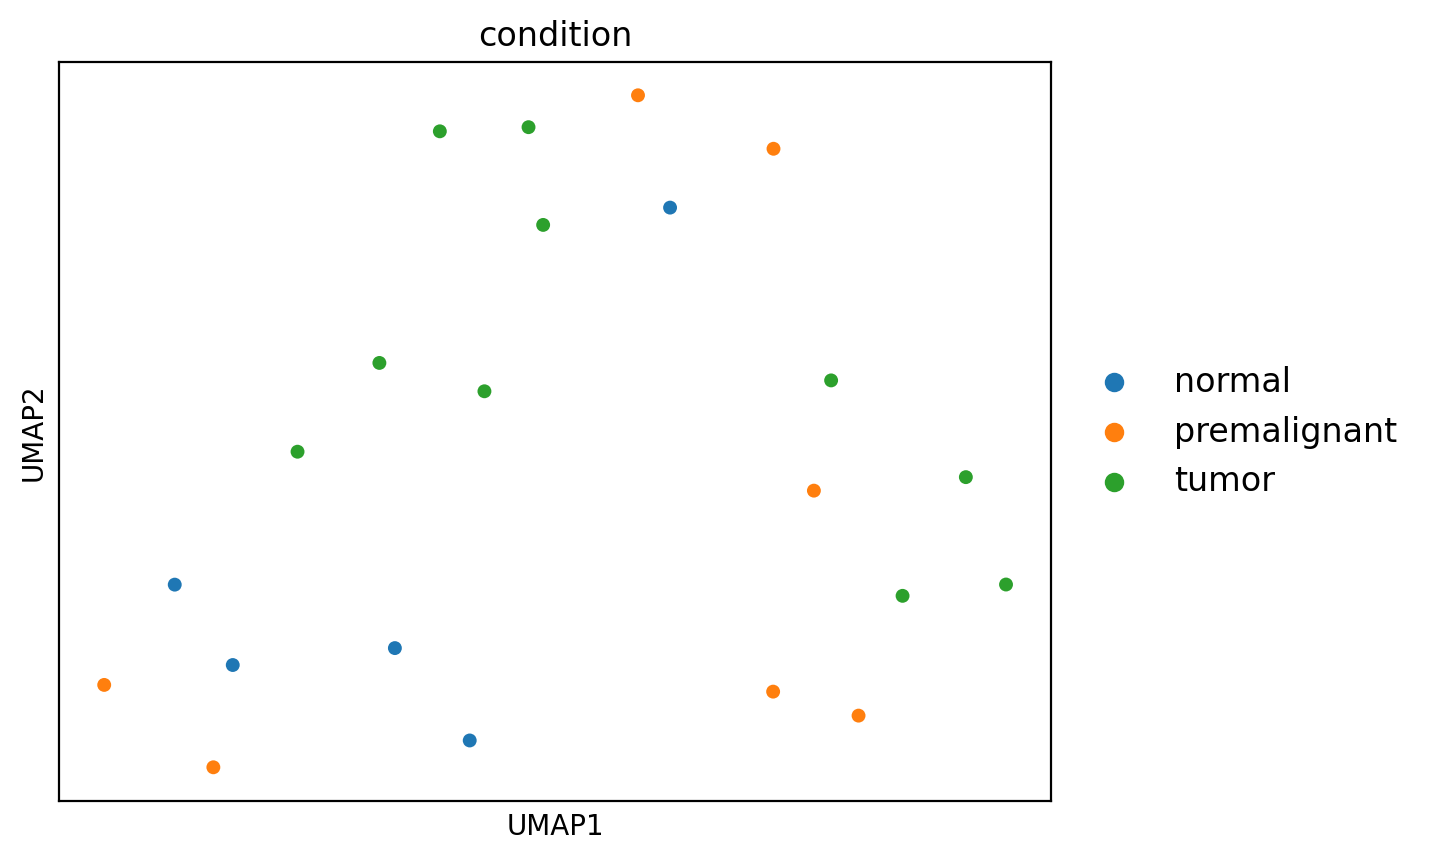

__Fig. 2__. UMAP visualization of quantile and log-normalized bulk data expression data colored by experimental condition.

/Users/giacomomarino/SC2Targets/figures/umap_bulk_data.png

/Users/giacomomarino/SC2Targets/figures/umap_bulk_data.svg

In [31]:
%%appyter code_exec
{% if data_type.raw_value == 'bulk RNA-seq' %}

#Visualize Bulk data by UMAP, use adata for convenience
adata = sc.AnnData(log2_normalize(qnorm.quantile_normalize(bulk_expr_df)).T.values)
adata.var['gene_symbols'] = bulk_expr_df.index.values
adata.obs['samples'] = bulk_expr_df.columns.values
adata.obs['condition'] = adata.obs['samples'].map(lambda x: metadata_df.loc[x, condition_col])

sc.pp.pca(adata, n_comps=2)
sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=2)
sc.tl.umap(adata, min_dist=min_dist)
sc.tl.leiden(adata, resolution=resolution)
 
sc.pl.umap(adata, color='condition', legend_fontweight='normal', legend_fontsize=12, size=100, save=f'_bulk_data.png')
sc.pl.umap(adata, color='condition', legend_fontweight='normal', legend_fontsize=12, size=100, save=f'_bulk_data.svg', show=False)

display(Markdown(f'__Fig. {fig_counter}__. UMAP visualization of quantile and log-normalized bulk data expression data colored by experimental condition.'))
display(FileLink('figures/umap_bulk_data.png', result_html_prefix='Download PNG: '))
display(FileLink('figures/umap_bulk_data.svg', result_html_prefix='Download SVG: '))
fig_counter += 1
{% endif %}

In [32]:
%%appyter markdown
{% if data_type.raw_value == 'bulk RNA-seq' %}
# Deconvolution with InstaPrism
InstaPrism [3] is a deconvolution tool based on the BayesPrism algorithm [2]. It utilizes a single cell RNA-seq cell type reference for deconvolution into cell type fractions for each bulk sample and also produces cell type specific estimated expression for each bulk sample.
{% endif %}


# Deconvolution with InstaPrism
InstaPrism [3] is a deconvolution tool based on the BayesPrism algorithm [2]. It utilizes a single cell RNA-seq cell type reference for deconvolution into cell type fractions for each bulk sample and also produces cell type specific estimated expression for each bulk sample.


In [33]:
%%appyter code_exec
{% if data_type.raw_value == 'bulk RNA-seq' %}
#Perform deconvolution with InstaPrism
#ref_url: str, bulk_expr: pd.DataFrame, output_dir: str, convert_dict: dict
ref_url = f'https://minio.dev.maayanlab.cloud/sc2targets/references/{sc_ref}.rds'
bulk_expr_norm = log2_normalize(qnorm.quantile_normalize(bulk_expr_df))
with suppress_output():
    estimated_frac_df, cell_type_dfs = deconvolution_insta_prism(ref_url, bulk_expr_norm, 'results', convert_dict)
shutil.make_archive('deconvolution_res', 'zip', 'results')
display(FileLink('deconvolution_res.zip', result_html_prefix='Download deconvolution results: '))
{% endif %}

```python
#Perform deconvolution with InstaPrism
#ref_url: str, bulk_expr: pd.DataFrame, output_dir: str, convert_dict: dict
ref_url = f'https://minio.dev.maayanlab.cloud/sc2targets/references/{sc_ref}.rds'
bulk_expr_norm = log2_normalize(qnorm.quantile_normalize(bulk_expr_df))
with suppress_output():
    estimated_frac_df, cell_type_dfs = deconvolution_insta_prism(ref_url, bulk_expr_norm, 'results', convert_dict)
shutil.make_archive('deconvolution_res', 'zip', 'results')
display(FileLink('deconvolution_res.zip', result_html_prefix='Download deconvolution results: '))
```

/Users/giacomomarino/SC2Targets/deconvolution_res.zip

```python
# visualize cell type fractions per condition
frac_df_viz = estimated_frac_df.copy()
frac_df_viz['condition'] = frac_df_viz.index.map(lambda x: metadata_df.loc[x, condition_col])
frac_df_viz.reset_index(inplace=True)
frac_df_viz.rename(columns={'index': 'sample'}, inplace=True)
df_melted = frac_df_viz.melt(id_vars=['sample', 'condition'], var_name='cell_type', value_name='fraction')
sns.boxplot(data=df_melted, x='condition', y='fraction', hue='cell_type', palette='Set2')
plt.xlabel('Condition')
plt.ylabel('Fraction')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/cell_type_fractions.svg', dpi=300)
plt.savefig('figures/cell_type_fractions.png', dpi=300)
plt.show()
display(Markdown(f'__Fig. {fig_counter}__. Cell type fractions per condition computed using the selected cell type reference and InstaPrism.'))
display(FileLink('figures/cell_type_fractions.svg', result_html_prefix='Download SVG: '))
display(FileLink('figures/cell_type_fractions.png', result_html_prefix='Download PNG: '))
fig_counter += 1
```

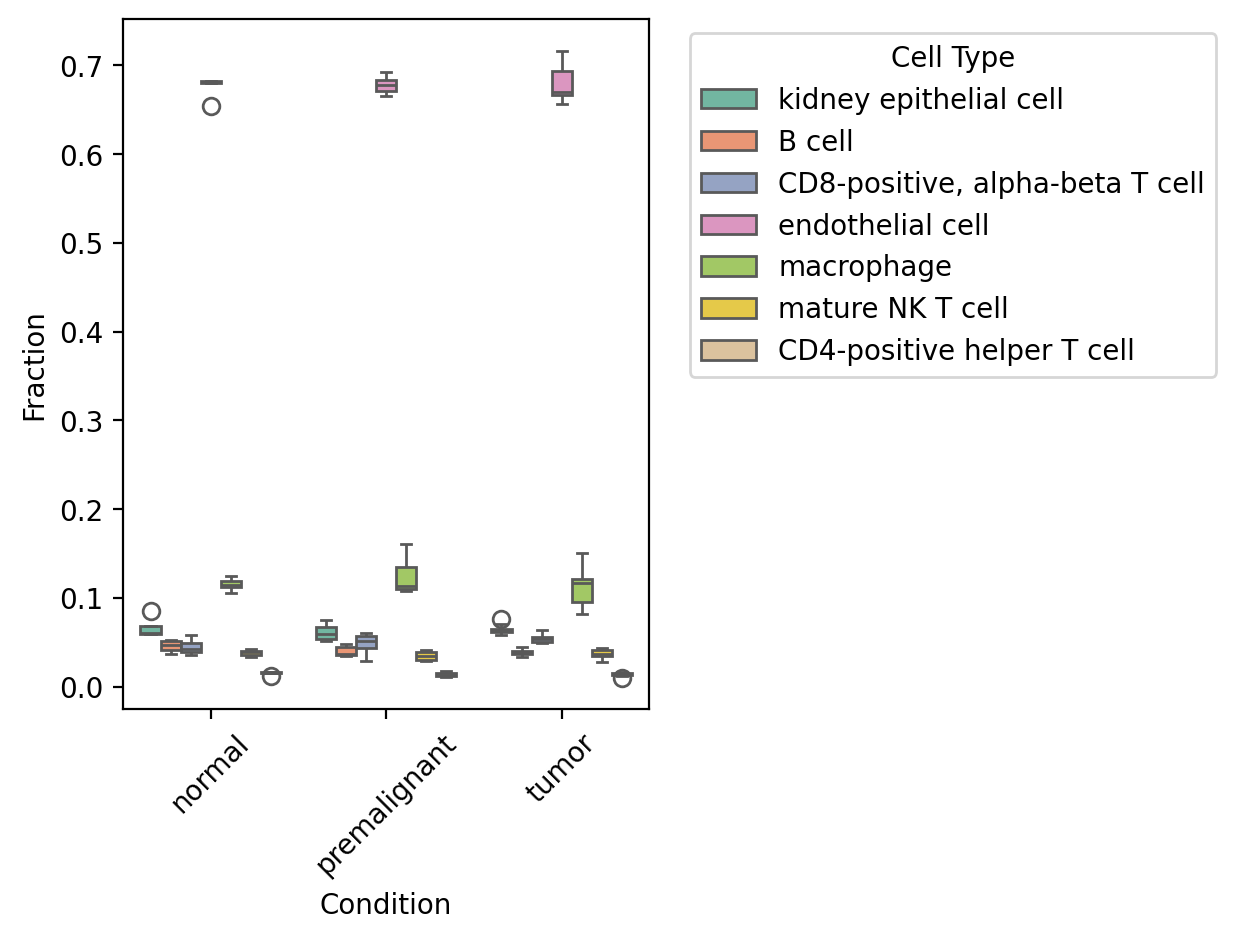

__Fig. 3__. Cell type fractions per condition computed using the selected cell type reference and InstaPrism.

/Users/giacomomarino/SC2Targets/figures/cell_type_fractions.svg

/Users/giacomomarino/SC2Targets/figures/cell_type_fractions.png

In [34]:
%%appyter code_exec
{% if data_type.raw_value == 'bulk RNA-seq' %}
# visualize cell type fractions per condition
frac_df_viz = estimated_frac_df.copy()
frac_df_viz['condition'] = frac_df_viz.index.map(lambda x: metadata_df.loc[x, condition_col])
frac_df_viz.reset_index(inplace=True)
frac_df_viz.rename(columns={'index': 'sample'}, inplace=True)
df_melted = frac_df_viz.melt(id_vars=['sample', 'condition'], var_name='cell_type', value_name='fraction')
sns.boxplot(data=df_melted, x='condition', y='fraction', hue='cell_type', palette='Set2')
plt.xlabel('Condition')
plt.ylabel('Fraction')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/cell_type_fractions.svg', dpi=300)
plt.savefig('figures/cell_type_fractions.png', dpi=300)
plt.show()

display(Markdown(f'__Fig. {fig_counter}__. Cell type fractions per condition computed using the selected cell type reference and InstaPrism.'))
display(FileLink('figures/cell_type_fractions.svg', result_html_prefix='Download SVG: '))
display(FileLink('figures/cell_type_fractions.png', result_html_prefix='Download PNG: '))
fig_counter += 1
{% endif %}

In [35]:
%%appyter code_exec
{% if data_type.raw_value == 'bulk RNA-seq' %}

pivot_df = df_melted.groupby(['condition', 'cell_type']).mean('fraction').reset_index().pivot(index='cell_type', columns='condition', values='fraction')

pert_conditions = list(set([c for c in metadata_df[condition_col].values if c != control_cond]))
# Calculate the difference
for pert in pert_conditions:
    if 'change' in pivot_df.columns:
        pivot_df['change'] = pivot_df[pert] - pivot_df[control_cond] + pivot_df['change']
    else:
        pivot_df['change'] = pivot_df[pert] - pivot_df[control_cond]

# Get the absolute change and sort
pivot_df['abs_change'] = pivot_df['change'].abs()
most_changed_df = pivot_df.sort_values(by='abs_change', ascending=False)

# Display the results
top_5 = most_changed_df.index.values[:5]
display(most_changed_df[['change', 'abs_change']])
display(Markdown(f'__Table. {table_counter}__. Cell types ranked by change across control and perturbed conditions.'))
table_counter += 1
{% endif %}

```python
pivot_df = df_melted.groupby(['condition', 'cell_type']).mean('fraction').reset_index().pivot(index='cell_type', columns='condition', values='fraction')
pert_conditions = list(set([c for c in metadata_df[condition_col].values if c != control_cond]))
# Calculate the difference
for pert in pert_conditions:
    if 'change' in pivot_df.columns:
        pivot_df['change'] = pivot_df[pert] - pivot_df[control_cond] + pivot_df['change']
    else:
        pivot_df['change'] = pivot_df[pert] - pivot_df[control_cond]
# Get the absolute change and sort
pivot_df['abs_change'] = pivot_df['change'].abs()
most_changed_df = pivot_df.sort_values(by='abs_change', ascending=False)
# Display the results
top_5 = most_changed_df.index.values[:5]
display(most_changed_df[['change', 'abs_change']])
display(Markdown(f'__Table. {table_counter}__. Cell types ranked by change across control and perturbed conditions.'))
table_counter += 1
```

condition,change,abs_change
cell_type,,
"CD8-positive, alpha-beta T cell",0.013123,0.013123
B cell,-0.012846,0.012846
macrophage,0.007757,0.007757
kidney epithelial cell,-0.007260,0.007260
endothelial cell,0.005824,0.005824
mature NK T cell,-0.004328,0.004328
CD4-positive helper T cell,-0.002269,0.002269


__Table. 1__. Cell types ranked by change across control and perturbed conditions.

```python
to_merge = []
for ct in cell_type_dfs:
    ct_name = ct.split('_Z')[0]
    if ct_name not in top_5:
        continue
    ct_df = cell_type_dfs[ct]
    ct_df.index =  ct_df.index.map(lambda x: f"{x}_{ct_name}_{metadata_df.loc[x, condition_col]}" if x in metadata_df.index else x)
    ct_df = ct_df.T
    ct_df.index = ct_df.index.map(lambda x: lookup(x) if lookup(x) else x)
    to_merge.append(ct_df)
bulk_ct_df = pd.concat(to_merge, axis=1)
bulk_ct_df
adata = sc.AnnData(log2_normalize(qnorm.quantile_normalize(bulk_ct_df)).T.values)
adata.var['gene_symbols'] = bulk_ct_df.index.values
adata.obs['samples'] = bulk_ct_df.columns.map(lambda x: x.split('_')[0])
adata.obs['cell type'] = bulk_ct_df.columns.map(lambda x: x.split('_')[1])
adata.obs['condition'] = bulk_ct_df.columns.map(lambda x: x.split('_')[2])
sc.pp.pca(adata, n_comps=2)
sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=2)
sc.tl.umap(adata, min_dist=min_dist)
sc.tl.leiden(adata, resolution=resolution)
sc.pl.umap(adata, color='condition',  legend_fontweight='normal', legend_fontsize=12, size=100, save='_condition_cell_type.png')
sc.pl.umap(adata, color='condition',  legend_fontweight='normal', legend_fontsize=12, size=100, save='_condition_cell_type.svg', show=False)
display(Markdown(f'__Fig. {fig_counter}__. UMAP visualization of quantile and log-normalized bulk data expression data colored by experimental condition.'))
display(FileLink('figures/umap_condition_cell_type.png', result_html_prefix='Download PNG: '))
display(FileLink('figures/umap_condition_cell_type.svg', result_html_prefix='Download SVG: '))
fig_counter += 1
sc.pl.umap(adata, color='cell type',  legend_fontweight='normal', legend_fontsize=12, size=100, save='_cell_type.png')
sc.pl.umap(adata, color='cell type',  legend_fontweight='normal', legend_fontsize=12, size=100, save='_cell_type.svg', show=False)
display(Markdown(f'__Fig. {fig_counter}__. UMAP visualization of quantile and log-normalized bulk data expression data colored by cell type.'))
display(FileLink('figures/umap_cell_type.png', result_html_prefix='Download PNG: '))
display(FileLink('figures/umap_cell_type.svg', result_html_prefix='Download SVG: '))
fig_counter += 1
```

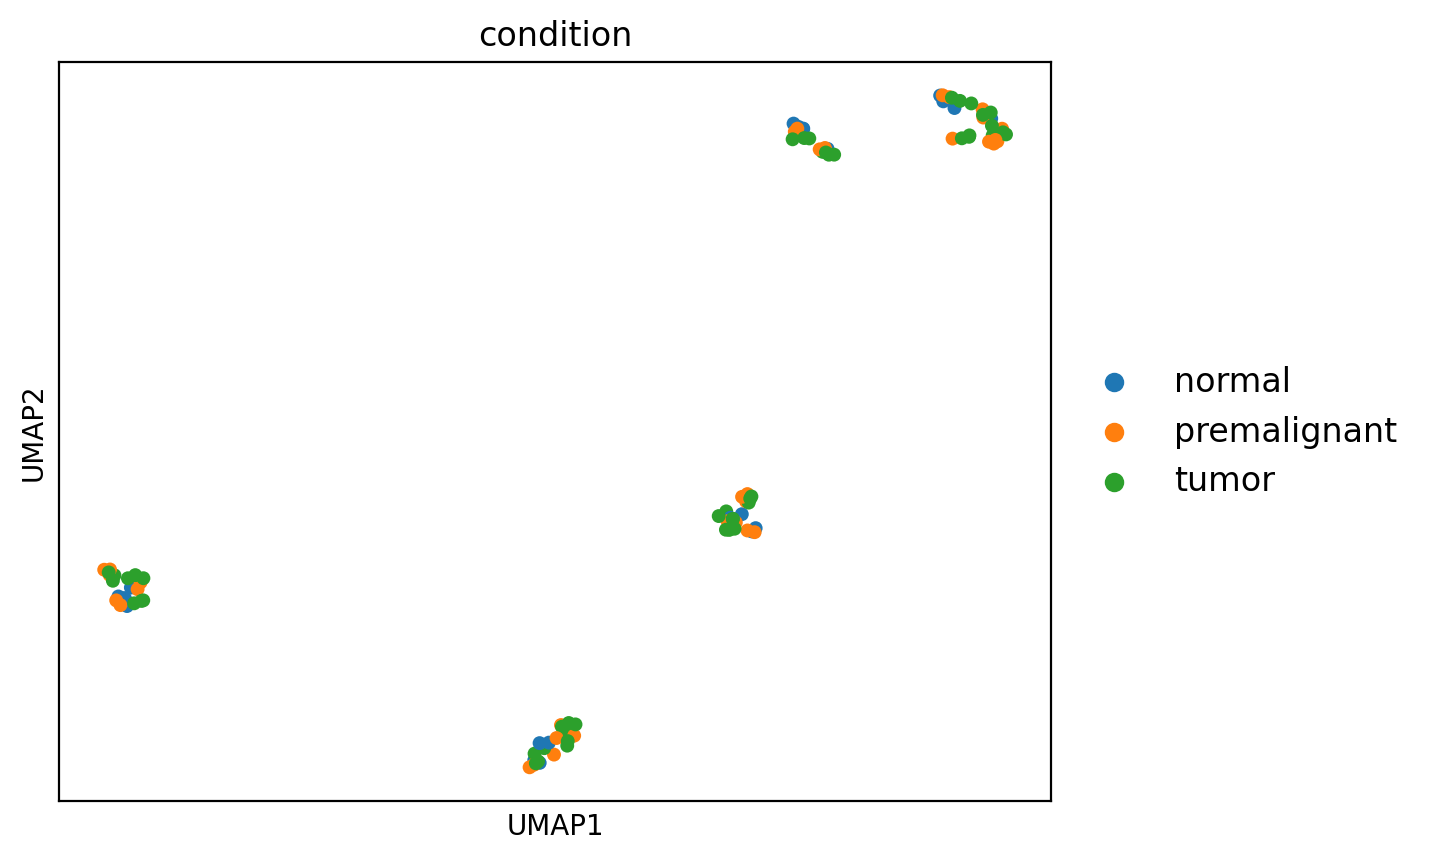

__Fig. 4__. UMAP visualization of quantile and log-normalized bulk data expression data colored by experimental condition.

/Users/giacomomarino/SC2Targets/figures/umap_condition_cell_type.png

/Users/giacomomarino/SC2Targets/figures/umap_condition_cell_type.svg

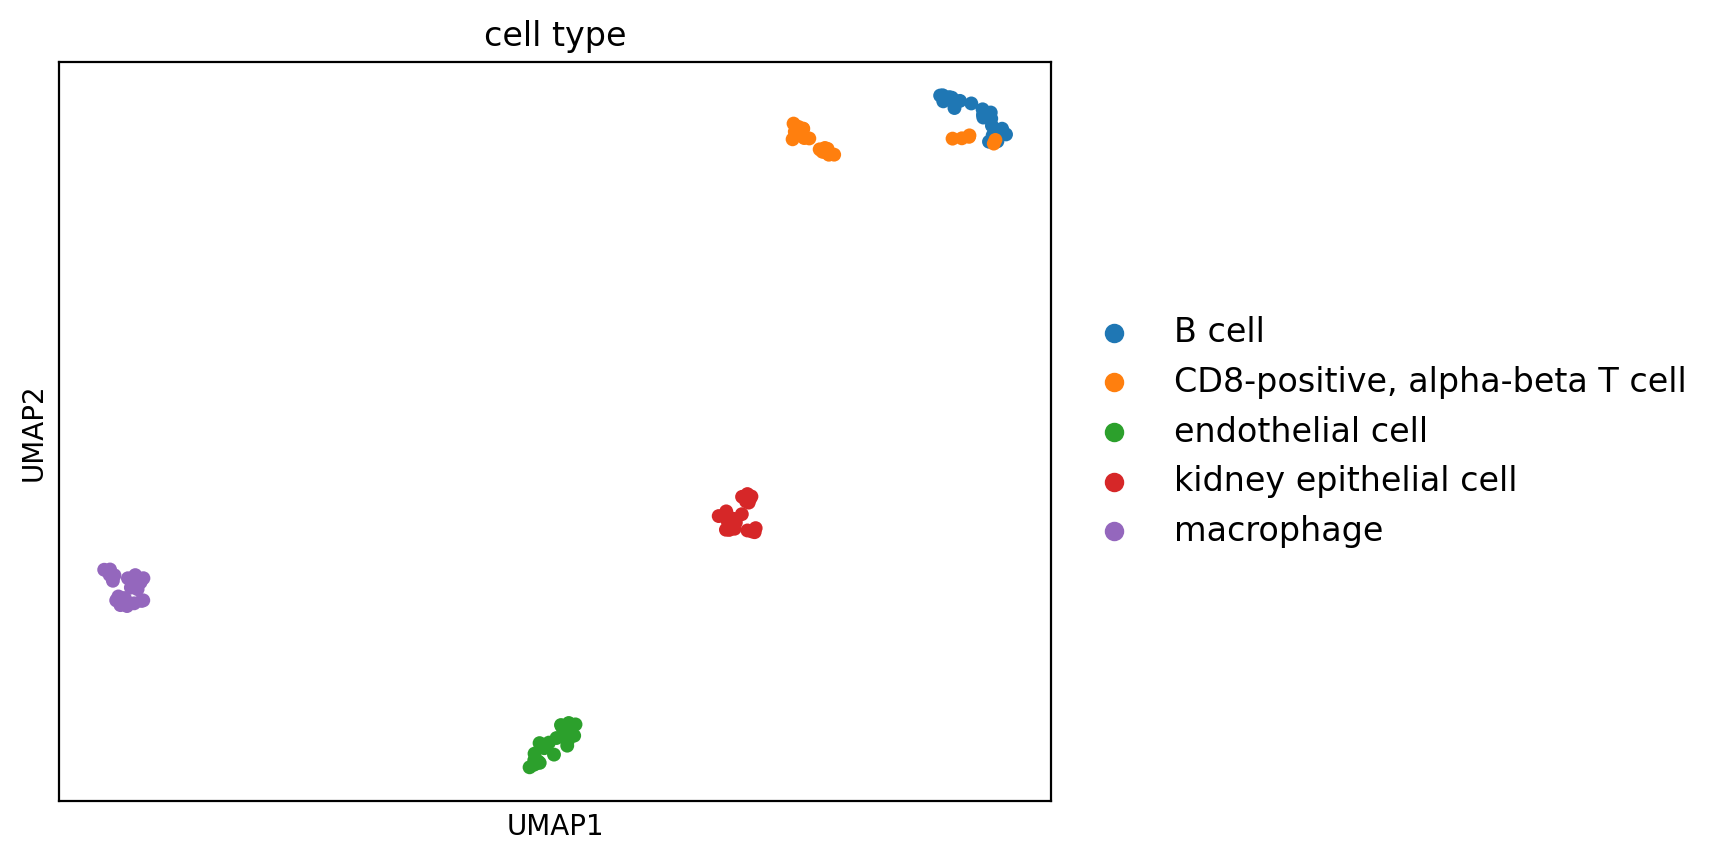

__Fig. 5__. UMAP visualization of quantile and log-normalized bulk data expression data colored by cell type.

/Users/giacomomarino/SC2Targets/figures/umap_cell_type.png

/Users/giacomomarino/SC2Targets/figures/umap_cell_type.svg

In [36]:
%%appyter code_exec
{% if data_type.raw_value == 'bulk RNA-seq' %}

to_merge = []
for ct in cell_type_dfs:
    ct_name = ct.split('_Z')[0]
    if ct_name not in top_5:
        continue
    ct_df = cell_type_dfs[ct]
    ct_df.index =  ct_df.index.map(lambda x: f"{x}_{ct_name}_{metadata_df.loc[x, condition_col]}" if x in metadata_df.index else x)
    ct_df = ct_df.T 
    ct_df.index = ct_df.index.map(lambda x: lookup(x) if lookup(x) else x)
    to_merge.append(ct_df)
bulk_ct_df = pd.concat(to_merge, axis=1)
bulk_ct_df

adata = sc.AnnData(log2_normalize(qnorm.quantile_normalize(bulk_ct_df)).T.values)
adata.var['gene_symbols'] = bulk_ct_df.index.values
adata.obs['samples'] = bulk_ct_df.columns.map(lambda x: x.split('_')[0])
adata.obs['cell type'] = bulk_ct_df.columns.map(lambda x: x.split('_')[1])
adata.obs['condition'] = bulk_ct_df.columns.map(lambda x: x.split('_')[2])

sc.pp.pca(adata, n_comps=2)
sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=2)
sc.tl.umap(adata, min_dist=min_dist)
sc.tl.leiden(adata, resolution=resolution)

sc.pl.umap(adata, color='condition',  legend_fontweight='normal', legend_fontsize=12, size=100, save='_condition_cell_type.png')
sc.pl.umap(adata, color='condition',  legend_fontweight='normal', legend_fontsize=12, size=100, save='_condition_cell_type.svg', show=False)
display(Markdown(f'__Fig. {fig_counter}__. UMAP visualization of quantile and log-normalized bulk data expression data colored by experimental condition.'))
display(FileLink('figures/umap_condition_cell_type.png', result_html_prefix='Download PNG: '))
display(FileLink('figures/umap_condition_cell_type.svg', result_html_prefix='Download SVG: '))
fig_counter += 1

sc.pl.umap(adata, color='cell type',  legend_fontweight='normal', legend_fontsize=12, size=100, save='_cell_type.png')
sc.pl.umap(adata, color='cell type',  legend_fontweight='normal', legend_fontsize=12, size=100, save='_cell_type.svg', show=False)
display(Markdown(f'__Fig. {fig_counter}__. UMAP visualization of quantile and log-normalized bulk data expression data colored by cell type.'))
display(FileLink('figures/umap_cell_type.png', result_html_prefix='Download PNG: '))
display(FileLink('figures/umap_cell_type.svg', result_html_prefix='Download SVG: '))
fig_counter += 1

{% endif %}

In [37]:
%%appyter markdown
{% if data_type.raw_value == 'scRNA-seq' %}
# scRNA-seq Dataset Integration
If two single cell profiles were uploaded, we first integrate them with Harmony [5]. Additionally, using scanpy [2], we perform standard normalization techniques.
{% endif %}

In [38]:
%%appyter code_exec
{% if data_type.raw_value == 'scRNA-seq' %}
## Identify cell types if no cell type column is provided
if sc_data_pert:
    anndata_concat = ad.concat([sc_data_ctrl, sc_data_pert])
else:
    anndata_concat = sc_data_ctrl

sc.pp.filter_genes(anndata_concat, min_cells=3)
sc.pp.filter_cells(anndata_concat, min_genes=500)

# Annotate the group of mitochondrial genes as 'mt'
sc.external.pp.scrublet(anndata_concat)
selected_pred_doublet_removed = anndata_concat.obs[anndata_concat.obs["predicted_doublet"]==False]
anndata_concat = anndata_concat[selected_pred_doublet_removed.index]
mito_genes = anndata_concat.var_names.str.startswith('mt-') 

anndata_concat.obs['percent_mito'] = np.squeeze(np.asarray(np.sum(
    anndata_concat[:, mito_genes].X, axis=1) / np.sum(anndata_concat.X, axis=1)))
selected_pred = anndata_concat.obs[anndata_concat.obs.percent_mito < 0.05]
anndata_concat = anndata_concat[selected_pred.index]

sc.pp.normalize_total(anndata_concat, target_sum=1e4)
sc.pp.log1p(anndata_concat)
sc.pp.highly_variable_genes(anndata_concat, n_top_genes=2000)
sc.pp.pca(anndata_concat)
if sc_data_pert:
    sce.pp.harmony_integrate(anndata_concat, 'replicate')
    sc.pp.neighbors(anndata_concat, n_neighbors=n_neighbors, use_rep='X_pca_harmony')
else:
    sc.pp.neighbors(anndata_concat, n_neighbors=n_neighbors)
sc.tl.umap(anndata_concat, min_dist=min_dist)
sc.tl.leiden(anndata_concat, resolution=resolution)
{% endif %}

In [39]:
%%appyter code_exec
{% if data_type.raw_value == 'scRNA-seq' %}
with plt.rc_context({"figure.figsize": (2, 2), "figure.dpi": (300), "font.size": 8, 'legend.markerscale': .5, 'legend.fontsize': 3}):
    sc.pl.umap(anndata_concat, color='replicate', title='',
             legend_fontweight='normal', legend_fontsize=6, save='_leiden_integrated_rep.png')
    sc.pl.umap(anndata_concat, color='replicate', title='',
             legend_fontweight='normal', legend_fontsize=6, save='_leiden_integrated_rep.svg', show=False)
display(Markdown(f'__Fig. {fig_counter}__. UMAP visualization of harmonized single cell datasets, colored by replicate.'))
display(FileLink('figures/umap_leiden_integrated_rep.png', result_html_prefix='Download PNG: '))
display(FileLink('figures/umap_leiden_integrated_rep.svg', result_html_prefix='Download SVG: '))
fig_counter += 1

with plt.rc_context({"figure.figsize": (2, 2), "figure.dpi": (300), "font.size": 8, 'legend.markerscale': .5, 'legend.fontsize': 3}):
        sc.pl.umap(anndata_concat, color='Group', title='',
                 legend_fontweight='normal', legend_fontsize=6, save='_leiden_integrated_group.png')
        sc.pl.umap(anndata_concat, color='Group', title='',
                legend_fontweight='normal', legend_fontsize=6, save='_leiden_integrated_group.svg', show=False)

display(Markdown(f'__Fig. {fig_counter}__. UMAP visualization of harmonized single cell datasets, colored by group.'))
display(FileLink('figures/umap_leiden_integrated_group.png', result_html_prefix='Download PNG: '))
display(FileLink('figures/umap_leiden_integrated_group.svg', result_html_prefix='Download SVG: '))
fig_counter += 1
{% endif %}

In [40]:
%%appyter markdown
{% if data_type.raw_value == 'scRNA-seq' %}
# Cell Type Identification
To identify cell types, first cells in the integrated profile are clustered using UMAP [4] and the Leiden algorithm [6]. Canonical cell type makers are sourced from PanglaoDB [7] and are used for enrichment analysis and visualization of inferred cell types using decoupleR [8] based on overrepresented markers. Cell types which exhibit the least cluster coherence across the conditions are then prioritized for the downstream analysis.
{% endif %}

In [41]:
%%appyter code_exec
{% if data_type.raw_value == 'scRNA-seq' %}
markers = pd.read_csv('https://minio.dev.maayanlab.cloud/sc2targets/PanglaoDB_markers_27_Mar_2020.tsv', sep='\t')
# Filter by canonical_marker and human
markers['human'] = markers['species'].str.contains('Hs')
markers['mouse'] = markers['species'].str.contains('Mm')
markers = markers[markers[species] & (markers['canonical marker'] == 1) & (markers[f'sensitivity_{species}'] > 0.5)]
markers = markers[~markers.duplicated(['cell type', 'official gene symbol'])]
markers.rename(columns={'cell type': 'cell_type', 'official gene symbol': 'genesymbol'}, inplace=True)
if species == 'mouse':
    markers['genesymbol'] = markers['genesymbol'].map(lambda x: x.lower().capitalize())
markers

dc.run_ora(
    mat=anndata_concat,
    net=markers,
    source='cell_type',
    target='genesymbol',
    min_n=3,
    verbose=True,
    use_raw=False
)

{% endif %}

In [42]:
%%appyter code_exec
{% if data_type.raw_value == 'scRNA-seq' %}
acts = dc.get_acts(anndata_concat, obsm_key='ora_estimate')
sc_cell_types = dc.rank_sources_groups(acts, groupby='leiden', reference='rest', method='t-test_overestim_var')
n_ctypes = 3
ctypes_dict = sc_cell_types.groupby('group').head(n_ctypes).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
{% endif %}

In [43]:
%%appyter code_exec
{% if data_type.raw_value == 'scRNA-seq' %}
sc.pl.matrixplot(acts, ctypes_dict, 'leiden', dendrogram=True, standard_scale='var',
                colorbar_title='Z-scaled scores', cmap='RdBu_r', save='cell_types.png', figsize=(8, 4))
sc.pl.matrixplot(acts, ctypes_dict, 'leiden', dendrogram=True, standard_scale='var',
                colorbar_title='Z-scaled scores', cmap='RdBu_r', save='cell_types.svg', figsize=(8, 4), show=False)
display(Markdown(f'__Fig. {fig_counter}__. Matrix visualization of scRNA-seq leiden cluster cell type enrichments.'))
display(FileLink('figures/matrixplot_cell_types.png', result_html_prefix='Download PNG: '))
display(FileLink('figures/matrixplot_cell_types.svg', result_html_prefix='Download SVG: '))
fig_counter += 1
{% endif %}

In [44]:
%%appyter code_exec
{% if data_type.raw_value == 'scRNA-seq' %}

annotation_dict = sc_cell_types.groupby('group').head(1).set_index('group')['names'].to_dict()
anndata_concat.obs['cell_type'] = [annotation_dict[clust] for clust in anndata_concat.obs['leiden']]
{% endif %}

In [45]:
%%appyter code_exec
{% if data_type.raw_value == 'scRNA-seq' %}
sc.pl.umap(anndata_concat, color='cell_type', save='_cell_types.png')
sc.pl.umap(anndata_concat, color='cell_type', save='_cell_types.svg', show=False)
display(Markdown(f'__Fig. {fig_counter}__. UMAP visualization of scRNA-seq cell types for the control profile.'))
display(FileLink('figures/umap_cell_types.png', result_html_prefix='Download PNG: '))
display(FileLink('figures/umap_cell_types.svg', result_html_prefix='Download SVG: '))
fig_counter += 1
{% endif %}

In [46]:
%%appyter code_exec
{% if data_type.raw_value == 'scRNA-seq' %}
## Compute Centroids Per Cell Type & Condition
from sklearn.metrics import silhouette_score
centriods = {}
scores = []
total_cells = anndata_concat.shape[0]
for ct in anndata_concat.obs['cell_type'].unique():
    centriods[ct] = {}
    if anndata_concat.obs[anndata_concat.obs['cell_type'] == ct].shape[0] >= (total_cells*.02):
        for cond in anndata_concat.obs['Group'].unique():
            cells = anndata_concat[(anndata_concat.obs['cell_type'] == ct) & (anndata_concat.obs['Group'] == cond)]
            centriods[ct][cond] = cells.obsm['X_umap']
        labels = np.concatenate([np.zeros(centriods[ct][control_cond].shape[0]), np.ones(centriods[ct][pert_cond].shape[0])])
        scores.append([ct, silhouette_score(np.concatenate([centriods[ct][control_cond], centriods[ct][pert_cond]], axis=0), labels=labels)])
    
ct_diff = pd.DataFrame(scores, columns=['Cell Type', 'Silhouette Score']).set_index('Cell Type').sort_values('Silhouette Score', ascending=True)
top_5 = list(ct_diff.index.values[:5])
ct_diff.to_csv('results/ct_silhouette_scores.csv')
display(ct_diff)
display(Markdown(f'__Table. {table_counter}__. Silhouette scores for cell type comparing normal and perturbation groups.'))
display(FileLink('results/ct_silhouette_scores.csv', result_html_prefix='Download CSV: '))
{% endif %}

In [47]:
%%appyter code_exec
{% if data_type.raw_value == 'scRNA-seq' %}

## get three representative samples per overlapping cell type
data_pert = []
sample_names_pert = []

data_ctrl = []
sample_names_ctrl = []
# get indices of shared genes for each mat

for ct in top_5:
    ## extract counts from samples matching the cell type:
    ct_cells = anndata_concat[(anndata_concat.obs['cell_type'] == ct) & (anndata_concat.obs['Group'] == pert_cond)].X.transpose()
    n_cells = ct_cells.shape[1]
    for i in range(3):
        rand_idx = np.random.choice(list(range(n_cells)), n_cells // 2, replace=False)
        ct_cells_rand_samp = ct_cells[:, rand_idx].sum(axis=1)
        data_pert.append(ct_cells_rand_samp)
        sample_names_pert.append(f'pert_{ct}_{i + 1}')
    
    ct_cells = anndata_concat[(anndata_concat.obs['cell_type'] == ct) & (anndata_concat.obs['Group'] == control_cond)].X.transpose()
    n_cells = ct_cells.shape[1]
    for i in range(3):
        rand_idx = np.random.choice(list(range(n_cells)), n_cells // 2, replace=False)
        ct_cells_rand_samp = ct_cells[:, rand_idx].sum(axis=1)
        data_ctrl.append(ct_cells_rand_samp)
        sample_names_ctrl.append(f'ctrl_{ct}_{i + 1}')

sim_bulk_pert = pd.DataFrame(data=data_pert, index=sample_names_pert, columns=anndata_concat.var_names).T
sim_bulk_ctrl = pd.DataFrame(data=data_ctrl, index=sample_names_ctrl, columns=anndata_concat.var_names).T
bulk_ct_df = pd.merge(sim_bulk_pert, sim_bulk_ctrl, left_index=True, right_index=True)
bulk_ct_df.to_csv('results/bulk_ct_df.csv')
display(bulk_ct_df)
display(Markdown(f'__Table. {table_counter}__. Three representative samples per overlapping cell type in the control and perturbation profiles.'))
display(FileLink('results/bulk_ct_df.csv', result_html_prefix='Download CSV: '))
table_counter += 1
{% endif %}

In [48]:
targets = {}
if species == 'mouse':
    lookup = ncbi_genes_lookup(organism='Mammalia/Mus_musculus')
    bgs = {'ARCHS4': 'Mammalia/Mus_musculus/archs4-gene-stats.tsv', 'Tabula Muris': 'Mammalia/Mus_musculus/tabula-muris-gene-stats.tsv' }
else:
    lookup = ncbi_genes_lookup()
    bgs = {'GTEx': 'gtex-gene-stats.tsv', 'ARCHS4': 'archs4-gene-stats.tsv', 'TS': 'ts_10x_cell-ontology-class_donors_tissue-labels_v1.tsv'}

In [49]:
%%appyter markdown

# Target Identification
{% if data_type.raw_value == 'scRNA-seq' %}
To identify highly expressed membrane targets on perturbed cell types, we utilize TargetRanger [9], a collection of heathy tissue and cell type atlases. TargetRanger works by finding genes highly expressed in perturbed cell types that are lowly expressed across healthy cell types and tissues. Additionally, we filter targets identified for the control profiles of each cell type to uniquely target diseased cell types.
{% elif data_type.raw_value == 'bulk RNA-seq' %}
To identify highly expressed membrane targets on perturbed cell types, we utilize TargetRanger [4], a collection of heathy tissue and cell type atlases. TargetRanger works by finding genes highly expressed in perturbed cell types that are lowly expressed across healthy cell types and tissues. Additionally, we filter targets identified for the control profiles of each cell type to uniquely target diseased cell types.
{% endif %}


# Target Identification

To identify highly expressed membrane targets on perturbed cell types, we utilize TargetRanger [4], a collection of heathy tissue and cell type atlases. TargetRanger works by finding genes highly expressed in perturbed cell types that are lowly expressed across healthy cell types and tissues. Additionally, we filter targets identified for the control profiles of each cell type to uniquely target diseased cell types.


In [50]:
def find_targets(rna_df, bg, targets):
    df_bg_stats = pd.read_csv(f"https://appyters.maayanlab.cloud/storage/Tumor_Gene_Target_Screener/{bgs[bg]}", sep='\t', index_col=[0,1])
    df_bg_genes = df_bg_stats.unstack().index.map(lambda idx: lookup(idx.partition('.')[0]))
    df_bg_stats = df_bg_stats.unstack().groupby(df_bg_genes, observed=True).median().stack()
    df_bg_expr = df_bg_stats.loc[(slice(None), ['25%', '50%', '75%']), :].unstack()
    common_index = list(set(rna_df.index) & set(df_bg_expr.index))
    expr_df = rna_df.loc[common_index, :]
    index_name = expr_df.index.name
    expr_df.reset_index(inplace=True)
    expr_df.drop_duplicates(subset=index_name, inplace=True)
    expr_df.set_index(index_name, inplace=True, drop=True)
    target_distribution = df_bg_expr.loc[common_index, :].median(axis=1)
    df_expr_norm = qnorm.quantile_normalize(expr_df.loc[common_index, :], target=target_distribution)
    df_bg_expr_norm = qnorm.quantile_normalize(df_bg_expr.loc[common_index, :], target=target_distribution)
    for ct in tqdm(top_5):
        if ct not in targets: targets[ct] = {}
        ct_pert_samples = list(filter(lambda x: ct in x and 'pert' in x, bulk_ct_df.columns))
        ct_ctrl_samples = list(filter(lambda x: ct in x and 'ctrl' in x, bulk_ct_df.columns))
        with suppress_output():
            df_bg_expr_norm.columns = df_bg_expr_norm.columns.to_flat_index().map(lambda s: ', '.join(s))
            dge_pert = ttest_differential_expression(
                df_bg_expr_norm, df_expr_norm[ct_pert_samples],
                log2norm=False,
            )
            dge_ctrl = ttest_differential_expression(
                df_bg_expr_norm, df_expr_norm[ct_ctrl_samples],
                log2norm=False,
            )
            overlapping_pert_norm = set(dge_pert[(dge_pert['AdjPval'] < 0.01) & (dge_pert['Statistic'] > 0)].sort_values('Statistic', ascending=False).index.values).difference(set(dge_ctrl[(dge_ctrl['AdjPval'] < 0.01) & (dge_ctrl['Statistic'] > 0)].sort_values('Statistic', ascending=False).index.values))
            targets[ct][bg] = list(dge_pert[(dge_pert['AdjPval'] < 0.01) & (dge_pert['Statistic'] > 0) & (~dge_pert.index.isin(overlapping_pert_norm))].sort_values('Statistic', ascending=False).index.values)

def find_targets_multiple_pert(rna_df, bg, targets, control_cond, pert_conditions):
    df_bg_stats = pd.read_csv(f"https://appyters.maayanlab.cloud/storage/Tumor_Gene_Target_Screener/{bgs[bg]}", sep='\t', index_col=[0,1])
    df_bg_genes = df_bg_stats.unstack().index.map(lambda idx: lookup(idx.partition('.')[0]))
    df_bg_stats = df_bg_stats.unstack().groupby(df_bg_genes, observed=True).median().stack()
    df_bg_expr = df_bg_stats.loc[(slice(None), ['25%', '50%', '75%']), :].unstack()
    common_index = list(set(rna_df.index) & set(df_bg_expr.index))
    expr_df = rna_df.loc[common_index, :]
    index_name = expr_df.index.name
    if index_name == None:
        expr_df.index.name = 'gene_name'
        index_name = 'gene_name'
    expr_df.reset_index(inplace=True)
    expr_df.drop_duplicates(subset=index_name, inplace=True)
    expr_df.set_index(index_name, inplace=True, drop=True)
    target_distribution = df_bg_expr.loc[common_index, :].median(axis=1)
    df_expr_norm = qnorm.quantile_normalize(expr_df.loc[common_index, :], target=target_distribution)
    df_bg_expr_norm = qnorm.quantile_normalize(df_bg_expr.loc[common_index, :], target=target_distribution)
    df_bg_expr_norm.columns = df_bg_expr_norm.columns.to_flat_index().map(lambda s: ', '.join(s))
    for ct in tqdm(top_5):
        ct_ctrl_samples = list(filter(lambda x: ct in x and control_cond in x, bulk_ct_df.columns))
        with suppress_output():
            dge_ctrl = ttest_differential_expression(
                df_bg_expr_norm, df_expr_norm[ct_ctrl_samples],
                log2norm=False,
            )
            for pert in pert_conditions:
                if f"{ct}-{pert}" not in targets: targets[f"{ct}-{pert}"] = {}
                ct_pert_samples = list(filter(lambda x: ct in x and pert in x, bulk_ct_df.columns))
                dge_pert = ttest_differential_expression(
                    df_bg_expr_norm, df_expr_norm[ct_pert_samples],
                    log2norm=False,
                )
                overlapping_pert_norm = set(dge_pert[(dge_pert['AdjPval'] < 0.01) & (dge_pert['Statistic'] > 0)].sort_values('Statistic', ascending=False).index.values).difference(set(dge_ctrl[(dge_ctrl['AdjPval'] < 0.01) & (dge_ctrl['Statistic'] > 0)].sort_values('Statistic', ascending=False).index.values))
                targets[f"{ct}-{pert}"][bg] = list(dge_pert[(dge_pert['AdjPval'] < 0.01) & (dge_pert['Statistic'] > 0) & (~dge_pert.index.isin(overlapping_pert_norm))].sort_values('Statistic', ascending=False).index.values)


In [51]:
%%appyter code_exec
if species == 'human': 
{% if data_type.raw_value == 'scRNA-seq' %}
    print('Finding Targets using ARCHS4')
    find_targets(bulk_ct_df, 'ARCHS4', targets)  
    print('Finding Targets using GTEx')
    find_targets(bulk_ct_df, 'GTEx', targets)
    print('Finding Targets using Tabula Sapiens')
    find_targets(bulk_ct_df, 'TS', targets)
{% elif data_type.raw_value == 'bulk RNA-seq' %}
    print('Finding Targets using ARCHS4')
    find_targets_multiple_pert(bulk_ct_df, 'ARCHS4', targets, control_cond, pert_conditions)
    print('Finding Targets using GTEx')
    find_targets_multiple_pert(bulk_ct_df, 'GTEx', targets, control_cond, pert_conditions)
    print('Finding Targets using Tabula Sapiens')
    find_targets_multiple_pert(bulk_ct_df, 'TS', targets, control_cond, pert_conditions)
{% endif %}
elif species == 'mouse':
{% if data_type.raw_value == 'scRNA-seq' %}
    print('Finding Targets using ARCHS4')
    find_targets(bulk_ct_df, 'ARCHS4', targets)
    print('Finding Targets using Tabula Muris')
    find_targets(bulk_ct_df, 'Tabula Muris', targets)
{% elif data_type.raw_value == 'bulk RNA-seq' %}
    print('Finding Targets using ARCHS4')
    find_targets_multiple_pert(bulk_ct_df, 'ARCHS4', targets, control_cond, pert_conditions)
    print('Finding Targets using Tabula Muris')
    find_targets_multiple_pert(bulk_ct_df, 'Tabula Muris', targets, control_cond, pert_conditions)
{% endif %}

```python
if species == 'human':
    print('Finding Targets using ARCHS4')
    find_targets_multiple_pert(bulk_ct_df, 'ARCHS4', targets, control_cond, pert_conditions)
    print('Finding Targets using GTEx')
    find_targets_multiple_pert(bulk_ct_df, 'GTEx', targets, control_cond, pert_conditions)
    print('Finding Targets using Tabula Sapiens')
    find_targets_multiple_pert(bulk_ct_df, 'TS', targets, control_cond, pert_conditions)
elif species == 'mouse':
    print('Finding Targets using ARCHS4')
    find_targets_multiple_pert(bulk_ct_df, 'ARCHS4', targets, control_cond, pert_conditions)
    print('Finding Targets using Tabula Muris')
    find_targets_multiple_pert(bulk_ct_df, 'Tabula Muris', targets, control_cond, pert_conditions)
```

Finding Targets using ARCHS4


  0%|          | 0/5 [00:00<?, ?it/s]


In [52]:
proteins = pd.read_csv('https://appyters.maayanlab.cloud/storage/Tumor_Gene_Target_Screener/surfaceome.csv')
membrane_proteins = list(proteins['genename'].dropna().values)

if species == 'human':
    sc.set_figure_params(scanpy=False)
    YlGnBu = cm.get_cmap('YlGnBu_r', 8)
    cmap = {"None":YlGnBu(0), "ARCHS4": YlGnBu(1), "GTEx":YlGnBu(2), "TS": YlGnBu(4), "ARCHS4-GTEx":YlGnBu(3),  "ARCHS4-TS": YlGnBu(5), "GTEx-TS": YlGnBu(6), "All": YlGnBu(7)}

    top_targets_n = 100
    target_list = []
    for ct in targets:
        for bg in targets[ct]:
            target_list.extend(list(filter(lambda g: g in membrane_proteins, list(targets[ct][bg])[:top_targets_n])))
    if len(set(target_list)) < 100:
        top_targets_n = 500
        for cluster in targets:
            for bg in targets[cluster]:
                target_list.extend(list(filter(lambda g: g in membrane_proteins, list(targets[cluster][bg])[:top_targets_n])))
    
    data1, data2, data3 = [], [], []
    similarity = []
    target_list = list(set(target_list))

    for gene in target_list:
        a = [1 if gene in list(targets[c]['ARCHS4'])[:top_targets_n] else 0 for c in list(targets.keys())]
        g = [2 if gene in list(targets[c]['GTEx'])[:top_targets_n] else 0 for c in list(targets.keys())]
        l = [4 if gene in list(targets[c]['TS'])[:top_targets_n] else 0 for c in list(targets.keys())]
        data1.append(a)
        data2.append(g)
        data3.append(l)
        similarity.append(np.dot(np.dot(np.array(a), np.array(g)), np.array(l)))

    data = np.add(np.add(data1, data2), data3)

    membrane_target_mat = pd.DataFrame(data)
    membrane_target_mat.columns = list(targets.keys())
    membrane_target_mat.index = target_list

    membrane_target_mat['count'] = membrane_target_mat.sum(axis=1)
    membrane_target_mat = membrane_target_mat[membrane_target_mat['count'] >= 7]
    membrane_target_mat = membrane_target_mat.rename_axis('Membrane Target').sort_values(by = ['count', 'Membrane Target'], ascending = [False, True]).drop('count', axis=1)

    h = membrane_target_mat.shape[0]
    
    g = sns.clustermap(membrane_target_mat, figsize=(2, 8), cmap=YlGnBu, cbar_pos=None, dendrogram_ratio=0.1-(h<40)*0.01*(h-30), row_cluster=False, xticklabels=True, yticklabels=True)
    g.ax_row_dendrogram.legend(handles=[Rectangle((0, 0), 0, 0, color=val, label=key) for key, val in cmap.items()],
                                    title='Background', loc='upper right')
    plt.grid(False)
    plt.savefig('figures/membrane_targets.svg', dpi=300)
    plt.savefig('figures/membrane_targets.png', dpi=300)
    plt.show()
    display(Markdown(f'__Fig. {fig_counter}__. Membrane Targets for perturbed cell types, filtered by genes upregulated in control cell types compared to healthy background atlases.'))
    display(FileLink('figures/membrane_targets.png', result_html_prefix='Download PNG: '))
    display(FileLink('figures/membrane_targets.svg', result_html_prefix='Download SVG: '))
    fig_counter += 1

    
elif species == 'mouse':
    YlGnBu = cm.get_cmap('YlGnBu_r', 4)
    cmap = {"None": YlGnBu(0), "ARCHS4": YlGnBu(1), "Tabula Muris":YlGnBu(2), "Both": YlGnBu(3)}

    top_targets_n = 100
    target_list = []
    for ct in targets:
        for bg in targets[ct]:
            target_list.extend(list(filter(lambda g: g.upper() in membrane_proteins, list(targets[ct][bg]))))
            #target_list.extend(list(targets[ct][bg])[:20])

    data1, data2 = [], []
    similarity = []
    target_list = list(set(target_list))

    for gene in target_list:
        a = [1 if gene in targets[c]['ARCHS4'] else 0 for c in top_5]
        g = [2 if gene in targets[c]['Tabula Muris'] else 0 for c in top_5]
        data1.append(a)
        data2.append(g)
        similarity.append(np.dot(np.array(a), np.array(g)))

    data = np.add(data1, data2)

    membrane_target_mat = pd.DataFrame(data)
    membrane_target_mat.columns = top_5
    membrane_target_mat.index = target_list
    
    membrane_target_mat['count'] = membrane_target_mat.sum(axis=1)
    membrane_target_mat = membrane_target_mat[membrane_target_mat['count'] >= 3]
    
    membrane_target_mat = membrane_target_mat.rename_axis('Membrane Target').sort_values(by = ['count', 'Membrane Target'], ascending = [False, True]).drop('count', axis=1)

    h = membrane_target_mat.shape[0]
    membrane_target_mat = membrane_target_mat.astype(float)
    plt.rcParams.update(plt.rcParamsDefault)
    g = sns.clustermap(membrane_target_mat, figsize=(3,0.2*h+2*(h<15)), cmap=YlGnBu, cbar_pos=None, dendrogram_ratio=0.1-(h<40)*0.01*(h-30), row_cluster=False, xticklabels=True, yticklabels=True)
    g.ax_row_dendrogram.legend(handles=[Rectangle((0, 0), 0, 0, color=val, label=key) for key, val in cmap.items()],
                                    title='Background', loc='upper right')
    plt.grid(False)
    plt.savefig('figures/membrane_targets.svg', dpi=300)
    plt.savefig('figures/membrane_targets.png', dpi=300)
    plt.show()
    display(Markdown(f'__Fig. {fig_counter}__. Membrane Targets for perturbed cell types, filtered by genes upregulated in control cell types compared to healthy background atlases.'))
    display(FileLink('figures/membrane_targets.png', result_html_prefix='Download PNG: '))
    display(FileLink('figures/membrane_targets.svg', result_html_prefix='Download SVG: '))
    fig_counter += 1

ValueError: Length mismatch: Expected axis has 1 elements, new values have 0 elements

In [ ]:
%%appyter markdown
# LINCS L1000 Reversers
{% if data_type.raw_value == 'scRNA-seq' %}
To identify reverser compounds and CRISPR KOs most likely to push diseased cell types to a healthy phenotype, we query SigCom LINCS [14] which is a web-based search engine that serves over 1.5 million gene expression signatures processed, analyzed, and visualized from LINCS [15], GTEx [10], and GEO [16]. SigCom LINCS provides rapid signature similarity search for mimickers and reversers given sets of up and down genes.
{% elif data_type.raw_value == 'bulk RNA-seq' %}
To identify reverser compounds and CRISPR KOs most likely to push diseased cell types to a healthy phenotype, we query SigCom LINCS [9] which is a web-based search engine that serves over 1.5 million gene expression signatures processed, analyzed, and visualized from LINCS [10], GTEx [5], and GEO [11]. SigCom LINCS provides rapid signature similarity search for mimickers and reversers given sets of up and down genes.
{% endif %}

In [ ]:

%%appyter code_exec
{% if data_type.raw_value == 'scRNA-seq' %}


data = []
for ct in top_5:
    ct_pert_samples = list(filter(lambda x: ct in x and 'pert' in x, bulk_ct_df.columns))
    ct_ctrl_samples = list(filter(lambda x: ct in x and 'ctrl' in x, bulk_ct_df.columns))
    if len(ct_pert_samples) > 0 and len(ct_ctrl_samples) > 0:
        diff_expr_ct = ttest_differential_expression(bulk_ct_df[ct_ctrl_samples], bulk_ct_df[ct_pert_samples], log2norm=False)
        up_genes = list(diff_expr_ct[(diff_expr_ct['Pval'] < 0.01) & (diff_expr_ct['Statistic'] > 0)].sort_values('Statistic', ascending=False).index.values[:500])
        down_genes = list(diff_expr_ct[(diff_expr_ct['Pval'] < 0.01) & (diff_expr_ct['Statistic'] < 0)].sort_values('Statistic', ascending=True).index.values[:500])
        if len(up_genes) >= 5 and len(down_genes) >= 5:
            input_data = {'up_entities': convert_entities(up_genes), 'down_entities': convert_entities(down_genes), 'description': ct}
            desc, link = get_sigcom_link(input_data)
            enrichment_id = link.split('/')[-1]
            data.append([ct, link, len(up_genes), len(down_genes)])
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
            cripsr_ko_reversers = get_sigcom_data(input_data, 'l1000_mean_xpr', enrichment_id)
            sns.barplot(cripsr_ko_reversers, y='name', x='abs(Z-sum)', ax=ax1, orient='h')
            ax1.set_title('CRISPR KO Reversers')
            ax1.set_ylabel('')
            chemical_perturbation_reverers = get_sigcom_data(input_data, 'l1000_mean_cp', enrichment_id)
            sns.barplot(chemical_perturbation_reverers, y='name', x='abs(Z-sum)', ax=ax2, orient='h')
            ax2.set_title('Chemical Perturbation Reversers')
            ax2.set_ylabel('')
            fig.tight_layout()
            plt.savefig(f'figures/{ct}_reversers.png', dpi=300)
            plt.savefig(f'figures/{ct}_reversers.svg', dpi=300)
            plt.show()
            display(Markdown(f'__Fig. {fig_counter}__. {ct} LINCS L1000 CRISPR KO and Chemical Perturbation Reversers.'))
            display(FileLink(f'figures/{ct}_reversers.png', result_html_prefix='Download SVG: '))
            display(FileLink(f'figures/{ct}_reversers.svg', result_html_prefix='Download SVG: '))
            fig_counter += 1

compound_df = pd.DataFrame(data, columns=['cell_type','link', 'up genes', 'down genes'])
compound_df.set_index('cell_type', inplace=True)
compound_df.to_csv('results/sigcom_links.csv')
compound_df = compound_df.style.format({'link': lambda url: f'<a href="{url}" rel="noopener noreferrer" target="_blank">SigCom LINCS</a>'})
display(compound_df)
display(Markdown(f'__Table. {table_counter}__. SigCom LINCS analysis links for overlapping cell types in control and perturbation scRNA-seq profiles.'))
display(FileLink('results/sigcom_links.csv', result_html_prefix='Download CSV: '))
table_counter += 1
{% elif data_type.raw_value == 'bulk RNA-seq' %}
data = []
for ct in tqdm(top_5):
    ct_ctrl_samples = list(filter(lambda x: ct in x and control_cond in x, bulk_ct_df.columns))
    for pert in pert_conditions:
        ct_pert_samples = list(filter(lambda x: ct in x and pert in x, bulk_ct_df.columns))
        diff_expr_ct = ttest_differential_expression(bulk_ct_df[ct_ctrl_samples], bulk_ct_df[ct_pert_samples], log2norm=False)
        up_genes = list(diff_expr_ct[(diff_expr_ct['Pval'] < 0.01) & (diff_expr_ct['Statistic'] > 0)].sort_values('Statistic', ascending=False).index.values[:500])
        down_genes = list(diff_expr_ct[(diff_expr_ct['Pval'] < 0.01) & (diff_expr_ct['Statistic'] < 0)].sort_values('Statistic', ascending=True).index.values[:500])
        if len(up_genes) >= 5 and len(down_genes) >= 5:
            input_data = {'up_entities': convert_entities(up_genes), 'down_entities': convert_entities(down_genes), 'description': ct}
            desc, link = get_sigcom_link(input_data)
            enrichment_id = link.split('/')[-1]
            data.append([ct, pert, link, len(up_genes), len(down_genes)])
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
            cripsr_ko_reversers = get_sigcom_data(input_data, 'l1000_mean_xpr', enrichment_id)
            sns.barplot(cripsr_ko_reversers, y='name', x='abs(Z-sum)', ax=ax1, orient='h')
            ax1.set_title('CRISPR KO Reversers')
            ax1.set_ylabel('')
            chemical_perturbation_reverers = get_sigcom_data(input_data, 'l1000_mean_cp', enrichment_id)
            sns.barplot(chemical_perturbation_reverers, y='name', x='abs(Z-sum)', ax=ax2, orient='h')
            ax2.set_title('LINCS L1000 Chemical Perturbation Reversers')
            ax2.set_ylabel('')
            fig.tight_layout()
            plt.savefig(f'figures/{ct}_{pert}_reversers.png', dpi=300)
            plt.savefig(f'figures/{ct}_{pert}_reversers.svg', dpi=300)
            plt.show()
            display(Markdown(f'__Fig. {fig_counter}__. {ct} - {pert} LINCS L1000 CRISPR KO and Chemical Perturbation Reversers.'))
            display(FileLink(f'figures/{ct}_{pert}_reversers.png', result_html_prefix='Download SVG: '))
            display(FileLink(f'figures/{ct}_{pert}_reversers.svg', result_html_prefix='Download SVG: '))
            fig_counter += 1
            

compound_df = pd.DataFrame(data, columns=['cell_type', 'perturbation', 'link', 'up genes', 'down genes'])
compound_df.set_index('cell_type', inplace=True)
compound_df.to_csv('results/sigcom_links.csv')
compound_df = compound_df.style.format({'link': lambda url: f'<a href="{url}" rel="noopener noreferrer" target="_blank">SigCom LINCS</a>'})
display(compound_df)
display(Markdown(f'__Table. {table_counter}__. SigCom LINCS analysis links for top 5 changed perturbed cell types.'))
display(FileLink('results/sigcom_links.csv', result_html_prefix='Download CSV: '))
table_counter += 1
{% endif %}

# References

In [ ]:
%%appyter markdown

{% if data_type.raw_value == 'scRNA-seq' %}

[1] Butler A, Hoffman P, Smibert P, Papalexi E, Satija R. Integrating single-cell transcriptomic data across different conditions, technologies, and species. Nat Biotechnol. 2018 Jun;36(5):411-420. doi: 10.1038/nbt.4096. 

[2] Wolf FA, Angerer P, Theis FJ. SCANPY: large-scale single-cell gene expression data analysis. Genome Biol. 2018 Feb 6;19(1):15. doi: 10.1186/s13059-017-1382-0.

[3] Wolock SL, Lopez R, Klein AM. Scrublet: Computational Identification of Cell Doublets in Single-Cell Transcriptomic Data. Cell Syst. 2019 Apr 24;8(4):281-291.e9. doi: 10.1016/j.cels.2018.11.005.

[4] McInnes L, Healy J, Saul N, Großberger L. UMAP: Uniform Manifold Approximation and Projection. J Open Source Softw. 2018 Sep 2;3(29):861. doi: 10.21105/joss.00861.

[5] Korsunsky I, Millard N, Fan J, Slowikowski K, Zhang F, Wei K, Baglaenko Y, Brenner M, Loh PR, Raychaudhuri S. Fast, sensitive and accurate integration of single-cell data with Harmony. Nat Methods. 2019 Dec;16(12):1289-1296. doi: 10.1038/s41592-019-0619-0.

[6] Traag VA, Waltman L, van Eck NJ. From Louvain to Leiden: guaranteeing well-connected communities. Sci Rep. 2019 Mar 26;9(1):5233. doi: 10.1038/s41598-019-41695-z.

[7] Franzén O, Gan LM, Björkegren JLM. PanglaoDB: a web server for exploration of mouse and human single-cell RNA sequencing data. Database (Oxford). 2019 Jan 1;2019:baz046. doi: 10.1093/database/baz046.

[8] Badia-I-Mompel P, Vélez Santiago J, Braunger J, Geiss C, Dimitrov D, Müller-Dott S, Taus P, Dugourd A, Holland CH, Ramirez Flores RO, Saez-Rodriguez J. decoupleR: ensemble of computational methods to infer biological activities from omics data. Bioinform Adv. 2022 Mar 8;2(1):vbac016. doi: 10.1093/bioadv/vbac016.

[9] Marino GB, Ngai M, Clarke DJB, Fleishman RH, Deng EZ, Xie Z, Ahmed N, Ma'ayan A. GeneRanger and TargetRanger: processed gene and protein expression levels across cells and tissues for target discovery. Nucleic Acids Res. 2023 Jul 5;51(W1):W213-W224.

[10] GTEx Consortium. The Genotype-Tissue Expression (GTEx) project. Nat Genet. 2013 Jun;45(6):580-5. doi: 10.1038/ng.2653. 

[11] Lachmann A, Torre D, Keenan AB, Jagodnik KM, Lee HJ, Wang L, Silverstein MC, Ma'ayan A. Massive mining of publicly available RNA-seq data from human and mouse. Nat Commun. 2018 Apr 10;9(1):1366. doi: 10.1038/s41467-018-03751-6.

[12] Tabula Sapiens Consortium. The Tabula Sapiens: A multiple-organ, single-cell transcriptomic atlas of humans. Science. 2022 May 13;376(6594):eabl4896. doi: 10.1126/science.abl4896.

[13] Tabula Muris Consortium. Single-cell transcriptomics of 20 mouse organs creates a Tabula Muris. Nature. 2018 Oct;562(7727):367-372. doi: 10.1038/s41586-018-0590-4. 

[14] Evangelista JE, Clarke DJB, Xie Z, Lachmann A, Jeon M, Chen K, Jagodnik KM, Jenkins SL, Kuleshov MV, Wojciechowicz ML, Schürer SC, Medvedovic M, Ma'ayan A. SigCom LINCS: data and metadata search engine for a million gene expression signatures. Nucleic Acids Res. 2022 Jul 5;50(W1):W697-W709. doi: 10.1093/nar/gkac328. 

[15] Keenan AB, Jenkins SL, Jagodnik KM, Koplev S, He E, Torre D, Wang Z, Dohlman AB, Silverstein MC, Lachmann A, Kuleshov MV, Ma'ayan A, Stathias V, Terryn R, Cooper D, Forlin M, Koleti A, Vidovic D, Chung C, Schürer SC, Vasiliauskas J, Pilarczyk M, Shamsaei B, Fazel M, Ren Y, Niu W, Clark NA, White S, Mahi N, Zhang L, Kouril M, Reichard JF, Sivaganesan S, Medvedovic M, Meller J, Koch RJ, Birtwistle MR, Iyengar R, Sobie EA, Azeloglu EU, Kaye J, Osterloh J, Haston K, Kalra J, Finkbiener S, Li J, Milani P, Adam M, Escalante-Chong R, Sachs K, Lenail A, Ramamoorthy D, Fraenkel E, Daigle G, Hussain U, Coye A, Rothstein J, Sareen D, Ornelas L, Banuelos M, Mandefro B, Ho R, Svendsen CN, Lim RG, Stocksdale J, Casale MS, Thompson TG, Wu J, Thompson LM, Dardov V, Venkatraman V, Matlock A, Van Eyk JE, Jaffe JD, Papanastasiou M, Subramanian A, Golub TR, Erickson SD, Fallahi-Sichani M, Hafner M, Gray NS, Lin JR, Mills CE, Muhlich JL, Niepel M, Shamu CE, Williams EH, Wrobel D, Sorger PK, Heiser LM, Gray JW, Korkola JE, Mills GB, LaBarge M, Feiler HS, Dane MA, Bucher E, Nederlof M, Sudar D, Gross S, Kilburn DF, Smith R, Devlin K, Margolis R, Derr L, Lee A, Pillai A. The Library of Integrated Network-Based Cellular Signatures NIH Program: System-Level Cataloging of Human Cells Response to Perturbations. Cell Syst. 2018 Jan 24;6(1):13-24. doi: 10.1016/j.cels.2017.11.001.

[16] Clough E, Barrett T. The Gene Expression Omnibus Database. Methods Mol Biol. 2016;1418:93-110. doi: 10.1007/978-1-4939-3578-9_5.

{% elif data_type.raw_value == 'bulk RNA-seq' %}

[1] McInnes L, Healy J, Saul N, Großberger L. UMAP: Uniform Manifold Approximation and Projection. J Open Source Softw. 2018 Sep 2;3(29):861. doi: 10.21105/joss.00861.

[2] Chu T, Wang Z, Pe'er D, Danko CG. Cell type and gene expression deconvolution with BayesPrism enables Bayesian integrative analysis across bulk and single-cell RNA sequencing in oncology. Nat Cancer. 2022 Apr;3(4):505-517. doi: 10.1038/s43018-022-00356-3.

[3] Hu M, Chikina M. InstaPrism: an R package for fast implementation of BayesPrism. Bioinformatics. 2024 Jul 1;40(7):btae440.

[4] Marino GB, Ngai M, Clarke DJB, Fleishman RH, Deng EZ, Xie Z, Ahmed N, Ma'ayan A. GeneRanger and TargetRanger: processed gene and protein expression levels across cells and tissues for target discovery. Nucleic Acids Res. 2023 Jul 5;51(W1):W213-W224.

[5] GTEx Consortium. The Genotype-Tissue Expression (GTEx) project. Nat Genet. 2013 Jun;45(6):580-5. doi: 10.1038/ng.2653. 

[6] Lachmann A, Torre D, Keenan AB, Jagodnik KM, Lee HJ, Wang L, Silverstein MC, Ma'ayan A. Massive mining of publicly available RNA-seq data from human and mouse. Nat Commun. 2018 Apr 10;9(1):1366. doi: 10.1038/s41467-018-03751-6.

[7] Tabula Sapiens Consortium. The Tabula Sapiens: A multiple-organ, single-cell transcriptomic atlas of humans. Science. 2022 May 13;376(6594):eabl4896. doi: 10.1126/science.abl4896.

[8] Tabula Muris Consortium. Single-cell transcriptomics of 20 mouse organs creates a Tabula Muris. Nature. 2018 Oct;562(7727):367-372. doi: 10.1038/s41586-018-0590-4. 

[9] Evangelista JE, Clarke DJB, Xie Z, Lachmann A, Jeon M, Chen K, Jagodnik KM, Jenkins SL, Kuleshov MV, Wojciechowicz ML, Schürer SC, Medvedovic M, Ma'ayan A. SigCom LINCS: data and metadata search engine for a million gene expression signatures. Nucleic Acids Res. 2022 Jul 5;50(W1):W697-W709. doi: 10.1093/nar/gkac328. 

[10] Keenan AB, Jenkins SL, Jagodnik KM, Koplev S, He E, Torre D, Wang Z, Dohlman AB, Silverstein MC, Lachmann A, Kuleshov MV, Ma'ayan A, Stathias V, Terryn R, Cooper D, Forlin M, Koleti A, Vidovic D, Chung C, Schürer SC, Vasiliauskas J, Pilarczyk M, Shamsaei B, Fazel M, Ren Y, Niu W, Clark NA, White S, Mahi N, Zhang L, Kouril M, Reichard JF, Sivaganesan S, Medvedovic M, Meller J, Koch RJ, Birtwistle MR, Iyengar R, Sobie EA, Azeloglu EU, Kaye J, Osterloh J, Haston K, Kalra J, Finkbiener S, Li J, Milani P, Adam M, Escalante-Chong R, Sachs K, Lenail A, Ramamoorthy D, Fraenkel E, Daigle G, Hussain U, Coye A, Rothstein J, Sareen D, Ornelas L, Banuelos M, Mandefro B, Ho R, Svendsen CN, Lim RG, Stocksdale J, Casale MS, Thompson TG, Wu J, Thompson LM, Dardov V, Venkatraman V, Matlock A, Van Eyk JE, Jaffe JD, Papanastasiou M, Subramanian A, Golub TR, Erickson SD, Fallahi-Sichani M, Hafner M, Gray NS, Lin JR, Mills CE, Muhlich JL, Niepel M, Shamu CE, Williams EH, Wrobel D, Sorger PK, Heiser LM, Gray JW, Korkola JE, Mills GB, LaBarge M, Feiler HS, Dane MA, Bucher E, Nederlof M, Sudar D, Gross S, Kilburn DF, Smith R, Devlin K, Margolis R, Derr L, Lee A, Pillai A. The Library of Integrated Network-Based Cellular Signatures NIH Program: System-Level Cataloging of Human Cells Response to Perturbations. Cell Syst. 2018 Jan 24;6(1):13-24. doi: 10.1016/j.cels.2017.11.001.

[11] Clough E, Barrett T. The Gene Expression Omnibus Database. Methods Mol Biol. 2016;1418:93-110. doi: 10.1007/978-1-4939-3578-9_5.

{% endif %}